## Build a Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data = pd.read_csv("./test.csv", index_col="index", low_memory=False)
train_data = pd.read_csv("./train.csv", index_col="index", low_memory=False)

### About the data

In [ ]:
train_data.head()

borough  block   lot  schooldist  council  zipcode firecomp  \
index                                                                
574546      BX   3717    64         8.0     18.0  10472.0     E096   
12600       QN  15818    48        27.0     31.0  11691.0     E264   
235922      BK   6787     7        22.0     48.0  11229.0     E276   
202581      BK    672    30        15.0     38.0  11232.0     E228   
155971      BK   6651  7501        21.0     44.0  11223.0     E330   

        policeprct  healthcenterdistrict  healtharea  ...  yearalter1  \
index                                                 ...               
574546        43.0                  26.0      3020.0  ...           0   
12600        101.0                  45.0      3800.0  ...           0   
235922        61.0                  35.0      7320.0  ...           0   
202581        72.0                  39.0      4400.0  ...           0   
155971        62.0                  37.0      8522.0  ...           0   

        yearalter2 histdist landmark builtfar tract2010     xcoord    ycoord  \
index                                                                          
574546           0      NaN      NaN     0.62        48  1018914.0  239801.0   
12600            0      NaN      NaN     0.48     99802  1051073.0  155952.0   
235922           0      NaN      NaN     0.69       548   998378.0  161944.0   
202581           0      NaN      NaN     1.24       101   983777.0  178952.0   
155971           0      NaN      NaN     3.59       426   990141.0  159965.0   

       zonemap target__office  
index                          
574546      6C          False  
12600      31A          False  
235922     23B          False  
202581     16B          False  
155971     22D          False  

[5 rows x 63 columns]

In [ ]:
### How large is the training data set and the test data set?
print("test data size: ", test_data.shape)
print("train data size: ", train_data.shape)

test data size:  (171843, 62)
train data size:  (687369, 63)


In [ ]:
### train data
train_data.target__office.value_counts()

False    681787
True       5582
Name: target__office, dtype: int64

### Features

In [ ]:
### numerical features
numeric_cols = train_data.select_dtypes(include="number").columns
print(numeric_cols)

Index(['block', 'lot', 'schooldist', 'council', 'zipcode', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'spdist3', 'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'numbldgs', 'numfloors', 'unitstotal',
       'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype',
       'bsmtcode', 'assessland', 'assesstot', 'exemptland', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'builtfar', 'tract2010',
       'xcoord', 'ycoord'],
      dtype='object')


In [ ]:
non_numeric_cols = list(set(train_data.columns) - set(numeric_cols))
print(non_numeric_cols)

['zonedist4', 'sanitsub', 'firecomp', 'zonedist3', 'overlay2', 'target__office', 'borough', 'spdist2', 'ltdheight', 'zonedist1', 'irrlotcode', 'splitzone', 'zonedist2', 'overlay1', 'histdist', 'ext', 'zonemap', 'landmark', 'spdist1']


In [ ]:
train_data[train_data.target__office == True]["officearea"].describe()

count    5.582000e+03
mean     6.206429e+04
std      1.962674e+05
min      0.000000e+00
25%      2.560000e+03
50%      6.446000e+03
75%      2.562475e+04
max      2.900000e+06
Name: officearea, dtype: float64

In [ ]:
train_data[train_data.target__office == True]["landuse"].value_counts()

5.0    5038
4.0     544
Name: landuse, dtype: int64

In [ ]:
train_data[train_data.target__office == False]["officearea"].describe()

count    6.817870e+05
mean     2.652114e+02
std      1.002153e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.400000e+06
Name: officearea, dtype: float64

In [ ]:
train_data[train_data.target__office == False]["landuse"].value_counts()

1.0     452251
2.0     105068
4.0      42830
11.0     21717
5.0      12163
10.0      9960
3.0       9950
8.0       9784
6.0       8509
9.0       4070
7.0       3192
Name: landuse, dtype: int64

### Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
feature_cols = ["officearea", "comarea", "yearbuilt"]

In [ ]:
X = train_data[feature_cols].copy(deep=True)
y = train_data["target__office"].copy(deep=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_hat = clf.predict(X_test)

### How does my model perform?

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
print("MSE:", mean_squared_error(y_test.astype(int), y_hat.astype(int)))
print("Accuracy:", accuracy_score(y_test.astype(int), y_hat.astype(int)))

MSE: 0.007833991676659378
Accuracy: 0.9921660083233407


# K-fold validation of model

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Number of folds
k = 10

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=kf)

# Print results
print(f"Accuracy scores for each fold: {scores}")
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy: {scores.std()}")


Accuracy scores for each fold: [0.991853   0.99138746 0.9922749  0.99173662 0.99160569 0.9922749
 0.99220216 0.99192575 0.99199849 0.99153282]
Mean accuracy: 0.9918791793834778
Standard deviation of accuracy: 0.00029857522454672245


# Classification report and Confusion Matrix

Baseline Model Performance on Training Data:
Accuracy: 0.9921660083233407


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00    225055
        True       0.00      0.00      0.00      1777

    accuracy                           0.99    226832
   macro avg       0.50      0.50      0.50    226832
weighted avg       0.98      0.99      0.99    226832



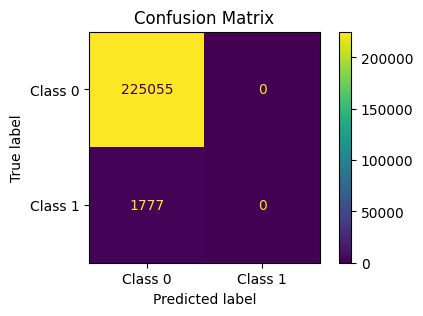

In [ ]:
print("Baseline Model Performance on Training Data:")
print("Accuracy:", accuracy_score(y_test, y_hat))
print("Classification Report:\n", classification_report(y_test, y_hat))
conf_matrix = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(figsize=(5, 3))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

<h2>Classification Report Analysis and Insights</h2>
<h3>Evaluation metrices Analysis</h3>
The classification report and confusion matrix indicate that the model is performing poorly in terms of classifying the 'True' instances:
Precision for the 'True' class is 0.00, indicating that out of all instances predicted as 'True', none were actually 'True'.
Recall for the 'True' class is also 0.00, which means the model failed to correctly identify any of the actual 'True' instances.
Consequently, the F1-score for the 'True' class is 0.00, which is the harmonic mean of precision and recall, indicating poor performance on the 'True' class.
For the 'False' class, the precision, recall, and F1-score are all 1.00, suggesting the model perfectly identified 'False' instances, but this is misleading due to the class imbalance.

<h3>Class Imbalance Issue</h3>
The support shows the number of true occurrences of each class in the dataset: 225,055 for 'False' and 1,777 for 'True'.

The overall accuracy of the model is 0.99, which seems high but is not informative in this case due to the class imbalance.

The macro average gives equal weight to each class, leading to an average precision, recall, and F1-score of 0.50. This suggests that when treating both classes equally, the model's performance is not good.

The weighted average accounts for class imbalance by weighting the scores by the support for each class. These scores are high (0.98, 0.99) because the 'False' class dominates the dataset.

The confusion matrix shows that the model predicted all instances as the 'False' class:

True Negatives (TN): 225,055 - The model correctly predicted 'False'.
False Negatives (FN): 1,777 - The model incorrectly predicted 'False' when the actual class was 'True'.
True Positives (TP): 0 - The model did not correctly predict any 'True' instances.
False Positives (FP): 0 - The model did not incorrectly predict 'True' for any 'False' instances.

<h3>Feature Selection Issue</h3>

The base model is using these 3 features for predictions: "officearea," "comarea," "yearbuilt" without any basis for their selection. There's a possibility of dropping important features in this random selection. Therefore, a proper feature selection method should have been employed here to ensure a more meaningful and effective model.

<h3>Summary</h3>

In summary, the model seems to be predicting only the 'False' class, failing to identify any 'True' instances. This indicates its inability to handle the class imbalance or to capture the complexities of the 'True' class. Additionally, the feature selection issue raises concerns about the model's reliance on randomly chosen features, emphasizing the need for a more thoughtful and systematic approach to feature selection.

## Following steps have been taken for Model enhancement

- Investigated and addressed issues, including missing values or inconsistencies.
- Normalized both numerical and categorical data to ensure a consistent scale.
- Employed ensemble methods and feature selection models for extraction of relevant features.
- Shortlisted the most important features based on the analysis from various models.
- Mitigated class imbalance through techniques such as SMOTE.
- Utilized the base model with refined parameters and introduced additional models for comprehensive analysis.
- Optimized model performance by employing techniques like GridSearchCV to determine the best hyperparameters.

# EDA & Data Cleaning



<h5>This section will cover different data preprocessing techniques including data cleaning, normalization, encodings for alpha numeric features</h5>

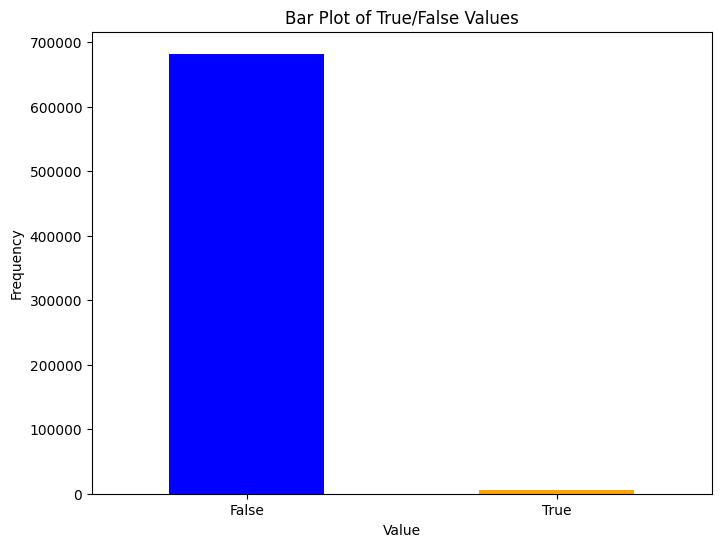

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Count the occurrence of True and False values
value_counts = train_data['target__office'].value_counts()
def bar_plot(value_counts):
  # Plotting the bar plot
  plt.figure(figsize=(8, 6))
  value_counts.plot(kind='bar', color=['blue', 'orange'])
  plt.title('Bar Plot of True/False Values')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.xticks([0, 1], ['False', 'True'], rotation=0)
  plt.show()

bar_plot(value_counts)

In [ ]:
# Data Overview: General Information
data_info = train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 687369 entries, 574546 to 460554
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               687369 non-null  object 
 1   block                 687369 non-null  int64  
 2   lot                   687369 non-null  int64  
 3   schooldist            685166 non-null  float64
 4   council               684952 non-null  float64
 5   zipcode               684042 non-null  float64
 6   firecomp              684565 non-null  object 
 7   policeprct            684997 non-null  float64
 8   healthcenterdistrict  685243 non-null  float64
 9   healtharea            684720 non-null  float64
 10  sanitboro             682276 non-null  float64
 11  sanitdistrict         682304 non-null  float64
 12  sanitsub              674668 non-null  object 
 13  zonedist1             686563 non-null  object 
 14  zonedist2             15888 non-null   object 


In [ ]:
# Descriptive Statistics for numerical features
descriptive_stats = train_data.describe()
print(descriptive_stats)

               block            lot     schooldist        council  \
count  687369.000000  687369.000000  685166.000000  684952.000000   
mean     5306.386833     133.282655      22.017301      32.083971   
std      3697.284943     745.194383       7.992494      13.246678   
min         0.000000       1.000000       1.000000       1.000000   
25%      2312.000000      19.000000      17.000000      22.000000   
50%      4811.000000      38.000000      24.000000      32.000000   
75%      7457.000000      64.000000      29.000000      45.000000   
max     16350.000000    9978.000000      32.000000      51.000000   

             zipcode     policeprct  healthcenterdistrict     healtharea  \
count  684042.000000  684997.000000         685243.000000  684720.000000   
mean    11012.095503      86.907395             38.260461    3268.041369   
std       471.241680      29.396923              9.630510    2664.771896   
min     10001.000000       1.000000             11.000000     100.000000  

In [ ]:
# Checking for missing values
missing_values = train_data.isnull().sum()
print(missing_values)

borough               0
block                 0
lot                   0
schooldist         2203
council            2417
                  ...  
tract2010             0
xcoord            19211
ycoord            19211
zonemap             787
target__office        0
Length: 63, dtype: int64


In [ ]:
# Checking for duplicated rows
duplicates = train_data.duplicated().sum()
duplicates

0

## Data Cleaning

<h4>
<ul>
<li>Following cells are calculation the missing value percentage for each feature. Based on percentage, threahold is set to shortlist features</li>
<li>Features with more than 50% missing values are dropped</li>
<li>This elimination is performed because features with such high levels of missing data will not contribute significantly to the model training process, potentially leading to unreliable and biased results</li></ul>

</h4>

In [ ]:
def missing_value_calculator(data):
  # percentage of missing values for each column.
  missing_percentage = (data.isnull().sum() / len(data)) * 100

  # only focus on columns with at least one missing value.
  columns_with_missing_values = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

  return columns_with_missing_values



columns_with_missing_values = missing_value_calculator(train_data)
print(columns_with_missing_values)

spdist3                 100.000000
zonedist4                99.998400
spdist2                  99.992144
overlay2                 99.981815
zonedist3                99.978323
landmark                 99.816692
ltdheight                99.648078
zonedist2                97.688578
histdist                 96.527920
overlay1                 91.297396
spdist1                  88.140431
ext                      59.256818
xcoord                    2.794860
ycoord                    2.794860
sanitsub                  1.847770
sanitboro                 0.740941
sanitdistrict             0.736868
zipcode                   0.484020
firecomp                  0.407932
healtharea                0.385383
council                   0.351631
policeprct                0.345084
landuse                   0.333591
schooldist                0.320497
healthcenterdistrict      0.309295
splitzone                 0.117259
zonedist1                 0.117259
zonemap                   0.114495
irrlotcode          

In [ ]:
type(columns_with_missing_values)

pandas.core.series.Series

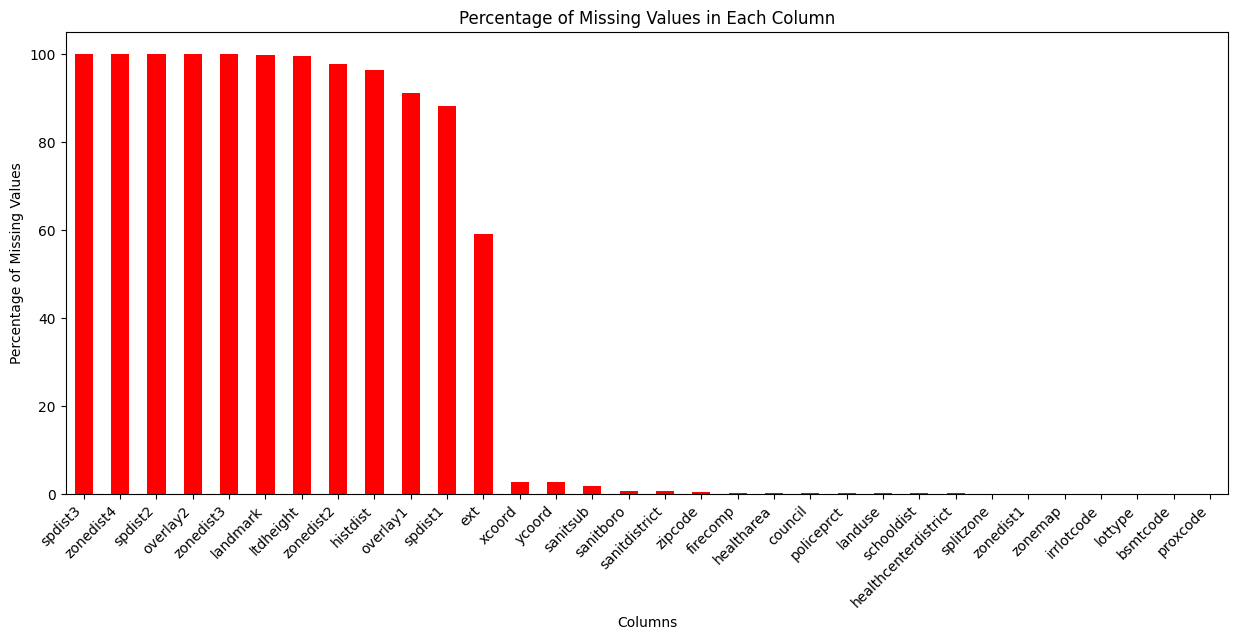

In [ ]:
plt.figure(figsize=(15, 6))
columns_with_missing_values.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Dropping columns with high missing values (threshold set at 50% missing values)
def column_droper(data,columns_with_missing_values,threshold=50):
  high_missing_columns = columns_with_missing_values[columns_with_missing_values > threshold].index
  data_cleaned = data.drop(columns=high_missing_columns)
  return data_cleaned

train_data_cleaned = column_droper(train_data,columns_with_missing_values)

In [ ]:
train_data_cleaned

borough  block   lot  schooldist  council  zipcode firecomp  \
index                                                                
574546      BX   3717    64         8.0     18.0  10472.0     E096   
12600       QN  15818    48        27.0     31.0  11691.0     E264   
235922      BK   6787     7        22.0     48.0  11229.0     E276   
202581      BK    672    30        15.0     38.0  11232.0     E228   
155971      BK   6651  7501        21.0     44.0  11223.0     E330   
...        ...    ...   ...         ...      ...      ...      ...   
245102      QN  14142    29        27.0     32.0  11414.0     L173   
312077      BK   1439   157        16.0     41.0  11233.0     L176   
623749      QN   9441   148        28.0     28.0  11419.0     Q270   
202332      QN   3007    56        24.0     30.0  11379.0     E319   
460554      BK   4884    60        17.0     40.0  11226.0     E248   

        policeprct  healthcenterdistrict  healtharea  ...  exempttot  \
index                                                 ...              
574546        43.0                  26.0      3020.0  ...          0   
12600        101.0                  45.0      3800.0  ...          0   
235922        61.0                  35.0      7320.0  ...       1470   
202581        72.0                  39.0      4400.0  ...          0   
155971        62.0                  37.0      8522.0  ...     356862   
...            ...                   ...         ...  ...        ...   
245102       106.0                  45.0      3611.0  ...       3210   
312077        73.0                  32.0      5200.0  ...      12931   
623749       102.0                  45.0      3210.0  ...       1470   
202332       104.0                  46.0      1822.0  ...       1470   
460554        67.0                  35.0      5520.0  ...          0   

        yearbuilt yearalter1 yearalter2 builtfar  tract2010     xcoord  \
index                                                                    
574546       1940          0          0     0.62         48  1018914.0   
12600        1930          0          0     0.48      99802  1051073.0   
235922       1930          0          0     0.69        548   998378.0   
202581       1910          0          0     1.24        101   983777.0   
155971       2002          0          0     3.59        426   990141.0   
...           ...        ...        ...      ...        ...        ...   
245102       1930          0          0     0.41        884  1030133.0   
312077       2003          0          0     1.19        303  1007094.0   
623749       1910          0          0     0.92        148  1033343.0   
202332       1940          0          0     0.68        677  1019375.0   
460554       1931          0          0     1.40        824   998351.0   

          ycoord  zonemap  target__office  
index                                      
574546  239801.0       6C           False  
12600   155952.0      31A           False  
235922  161944.0      23B           False  
202581  178952.0      16B           False  
155971  159965.0      22D           False  
...          ...      ...             ...  
245102  181221.0      18B           False  
312077  185338.0      17A           False  
623749  192134.0      14D           False  
202332  201119.0      13C           False  
460554  176156.0      17B           False  

[687369 rows x 51 columns]

<h4>Following cells focus on filtering rows in which certain feature values are null. The number of rows for both true and false classes is then determined. Since the dataset contains unique data, filling missing values is deemed to introduce noise. Therefore, all rows with any feature having missing values are dropped to maintain data integrity and reliability<h4>

In [ ]:
def get_null_data(train_data_cleaned, label = False):
  target_data = train_data_cleaned[train_data_cleaned['target__office'] == label]
  count = target_data.isnull().any(axis=1).sum()

  return target_data, count

In [ ]:
def drop_null_data(train_data_cleaned, target_data, label):
  if label == False:
    data_cleaned = train_data_cleaned.drop(target_data[target_data.isnull().any(axis=1)].index)
  else:
    data_cleaned = train_data_cleaned.dropna()

  return data_cleaned

In [ ]:
data, count = get_null_data(train_data_cleaned)

# Count of rows where target_variable is False
print('Null rows where target_variable is False',count)

Null rows where target_variable is False 28144


In [ ]:
#Drop Null data with label False
data_cleaned = drop_null_data(train_data_cleaned, data, False)
data, count = get_null_data(data_cleaned)

# Count of rows where target_variable is False after dropping nulls
print('Null rows where target_variable is False',count)

Null rows where target_variable is False 0


In [ ]:
data, count = get_null_data(data_cleaned, True)

# Count of rows where target_variable is True
print('Null rows where target_variable is True',count)

Null rows where target_variable is True 73


In [ ]:
#Drop Null data with label True
data_cleaned = drop_null_data(data_cleaned, data, True)
data, count = get_null_data(data_cleaned)

# Count of rows where target_variable is True after dropping nulls
print('Null rows where target_variable is True',count)

Null rows where target_variable is True 0


In [ ]:
# Display the resulting DataFrame
data_cleaned

borough  block  lot  schooldist  council  zipcode firecomp  policeprct  \
index                                                                           
574546      BX   3717   64         8.0     18.0  10472.0     E096        43.0   
12600       QN  15818   48        27.0     31.0  11691.0     E264       101.0   
235922      BK   6787    7        22.0     48.0  11229.0     E276        61.0   
202581      BK    672   30        15.0     38.0  11232.0     E228        72.0   
496241      QN   1583  151        24.0     25.0  11373.0     E289       110.0   
...        ...    ...  ...         ...      ...      ...      ...         ...   
245102      QN  14142   29        27.0     32.0  11414.0     L173       106.0   
312077      BK   1439  157        16.0     41.0  11233.0     L176        73.0   
623749      QN   9441  148        28.0     28.0  11419.0     Q270       102.0   
202332      QN   3007   56        24.0     30.0  11379.0     E319       104.0   
460554      BK   4884   60        17.0     40.0  11226.0     E248        67.0   

        healthcenterdistrict  healtharea  ...  exempttot  yearbuilt  \
index                                     ...                         
574546                  26.0      3020.0  ...          0       1940   
12600                   45.0      3800.0  ...          0       1930   
235922                  35.0      7320.0  ...       1470       1930   
202581                  39.0      4400.0  ...          0       1910   
496241                  42.0      1420.0  ...          0       1968   
...                      ...         ...  ...        ...        ...   
245102                  45.0      3611.0  ...       3210       1930   
312077                  32.0      5200.0  ...      12931       2003   
623749                  45.0      3210.0  ...       1470       1910   
202332                  46.0      1822.0  ...       1470       1940   
460554                  35.0      5520.0  ...          0       1931   

       yearalter1 yearalter2 builtfar  tract2010     xcoord    ycoord  \
index                                                                   
574546          0          0     0.62         48  1018914.0  239801.0   
12600           0          0     0.48      99802  1051073.0  155952.0   
235922          0          0     0.69        548   998378.0  161944.0   
202581          0          0     1.24        101   983777.0  178952.0   
496241          0          0     1.52        471  1018443.0  209795.0   
...           ...        ...      ...        ...        ...       ...   
245102          0          0     0.41        884  1030133.0  181221.0   
312077          0          0     1.19        303  1007094.0  185338.0   
623749          0          0     0.92        148  1033343.0  192134.0   
202332          0          0     0.68        677  1019375.0  201119.0   
460554          0          0     1.40        824   998351.0  176156.0   

        zonemap  target__office  
index                            
574546       6C           False  
12600       31A           False  
235922      23B           False  
202581      16B           False  
496241       9D           False  
...         ...             ...  
245102      18B           False  
312077      17A           False  
623749      14D           False  
202332      13C           False  
460554      17B           False  

[659152 rows x 51 columns]

<h3>Graphs showing distribution of numerical data before normalisation</h3>
<h4>These plots visualize the distribution of numerical data, allowing for an analysis of the data's shape and central tendency before normalization</h4>

<ipython-input-62-ed85d32fe378>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


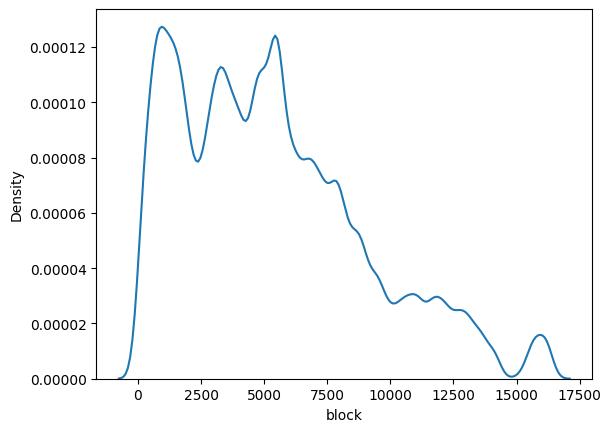

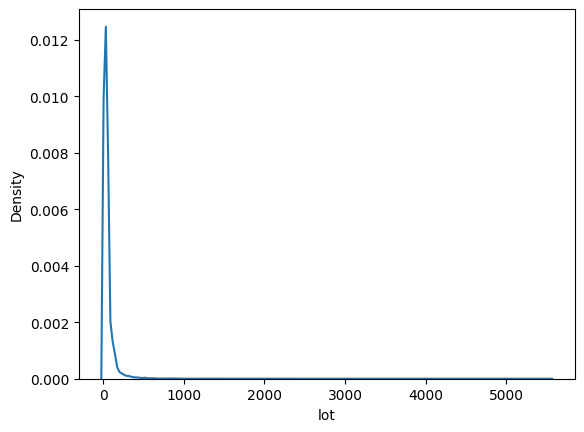

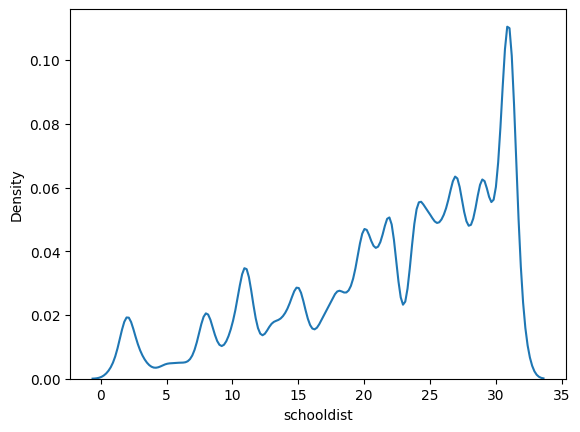

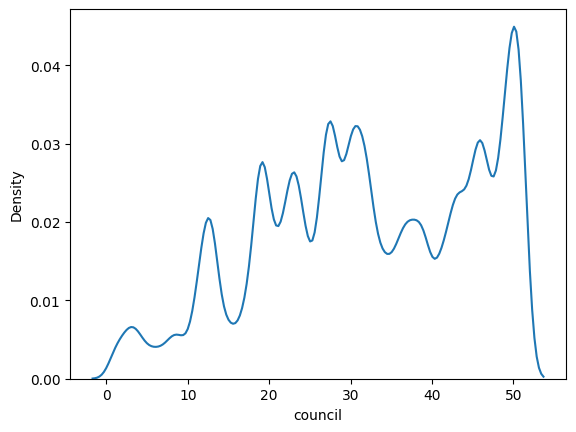

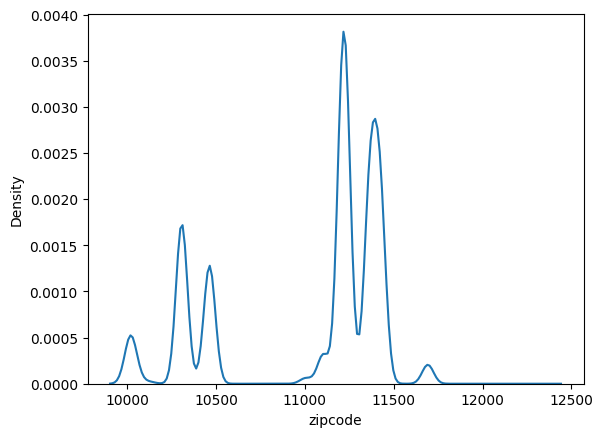

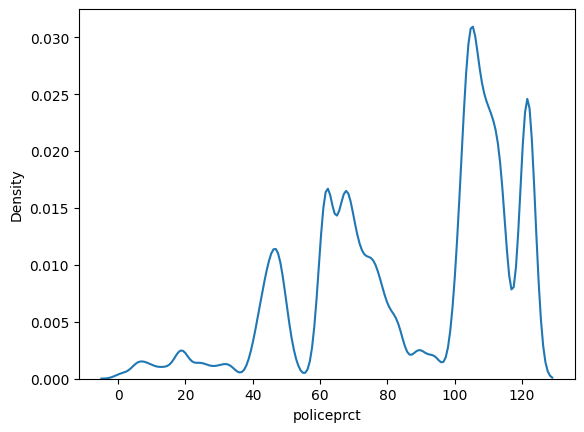

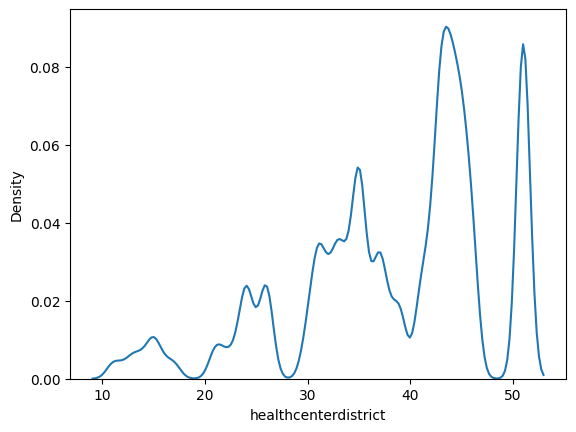

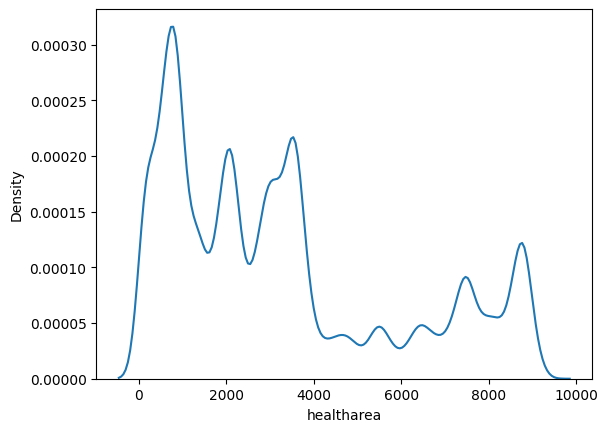

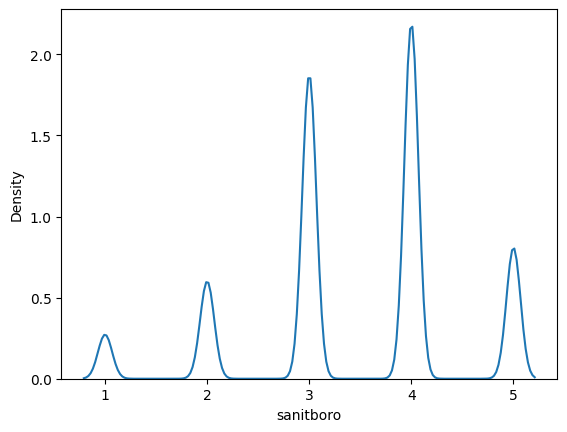

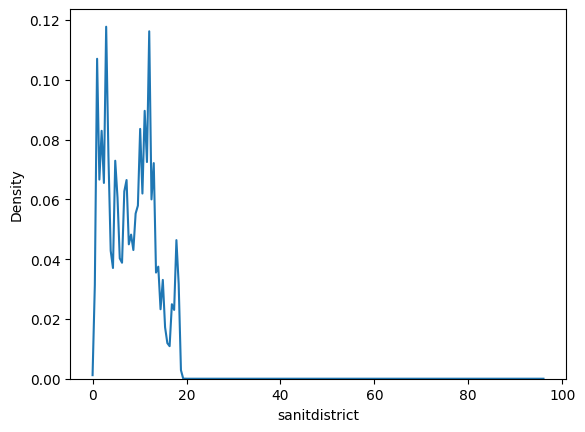

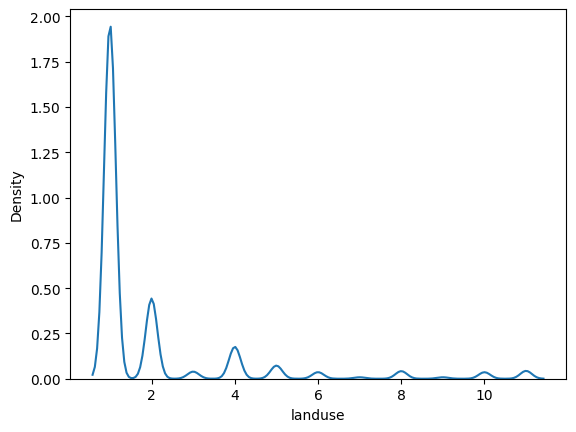

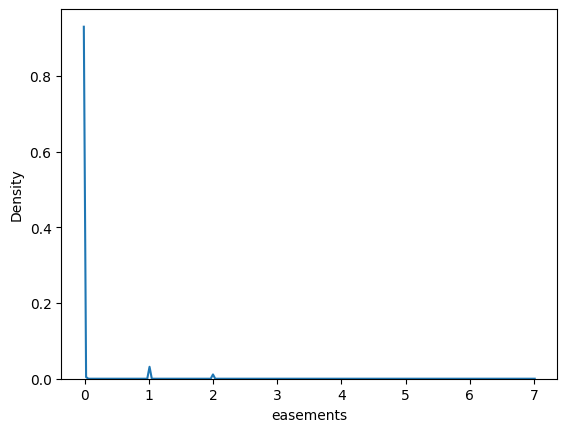

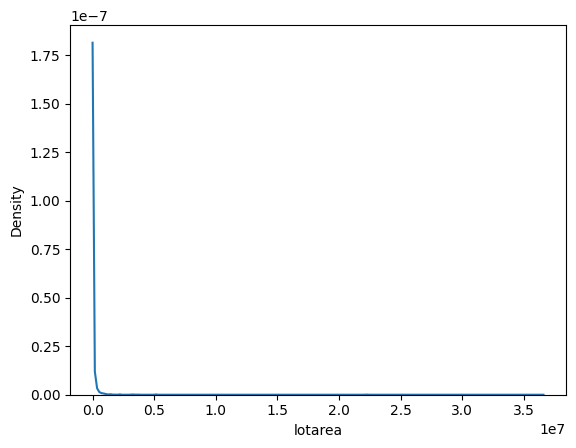

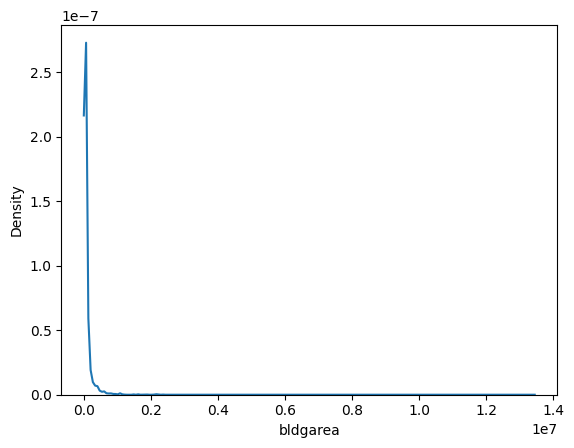

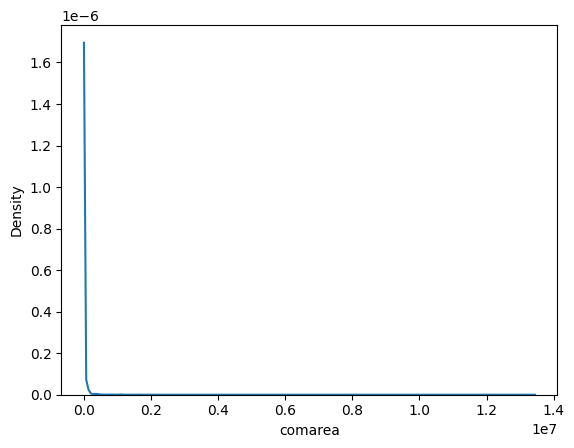

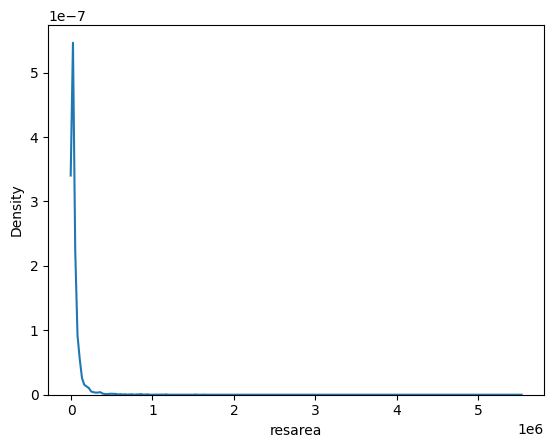

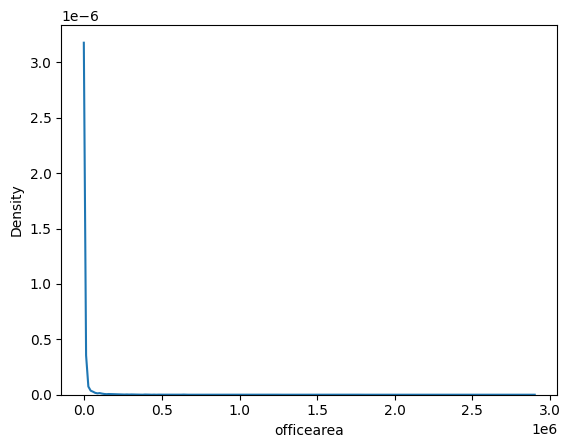

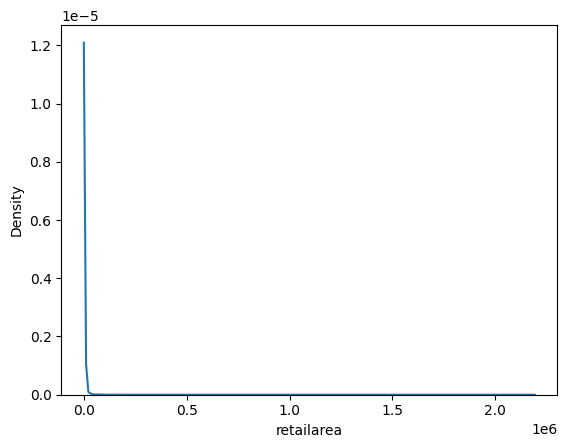

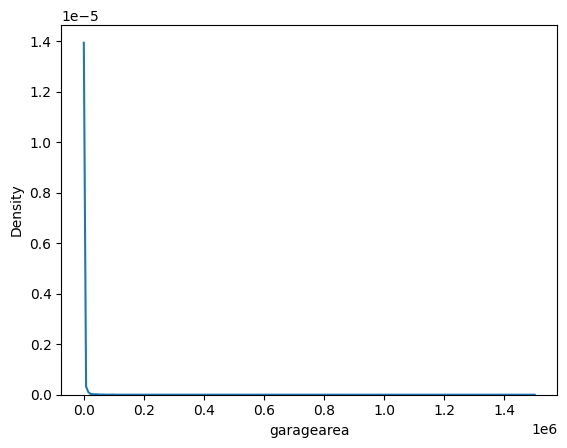

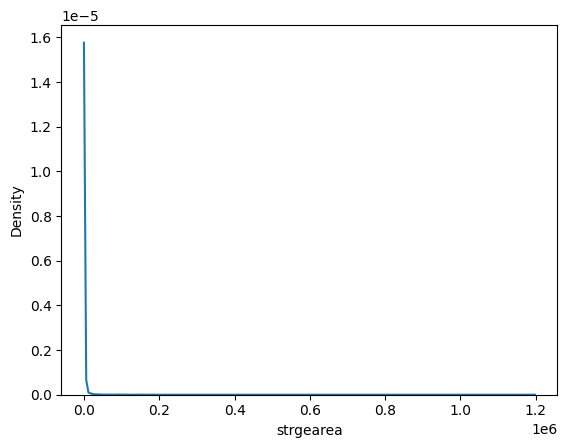

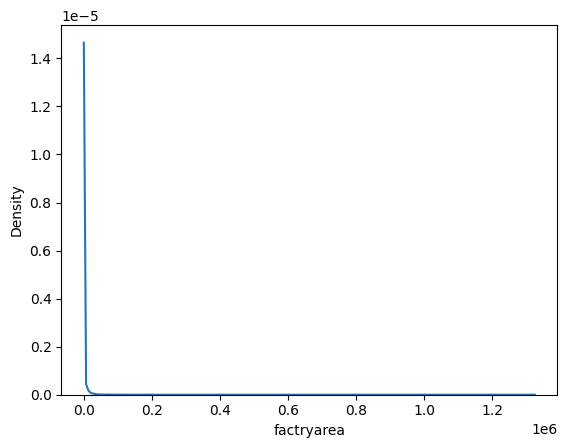

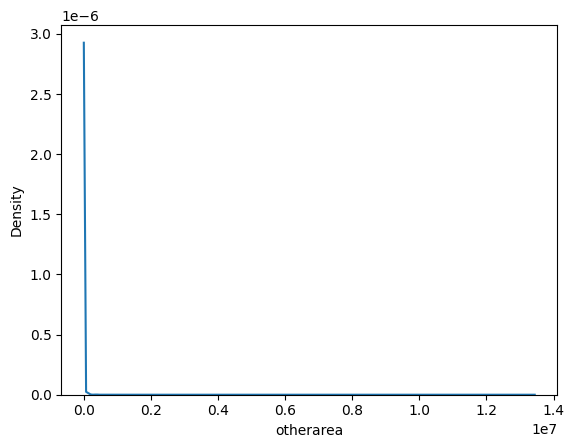

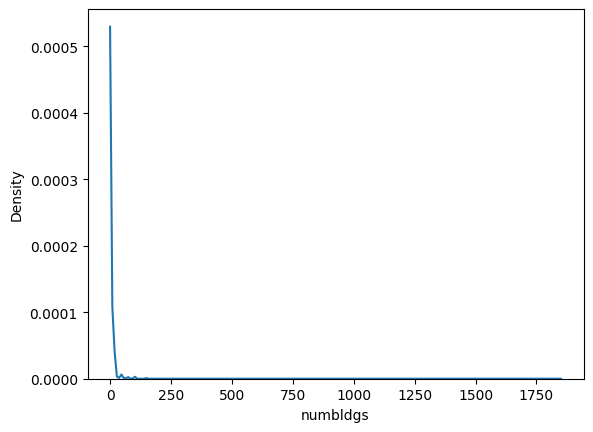

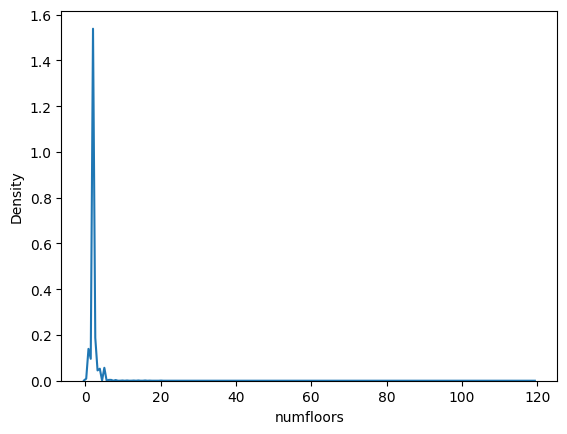

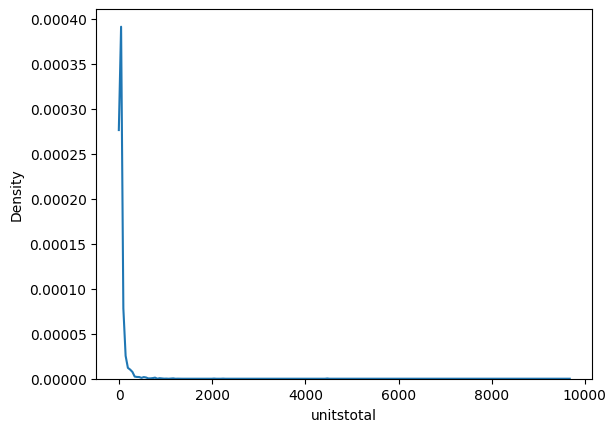

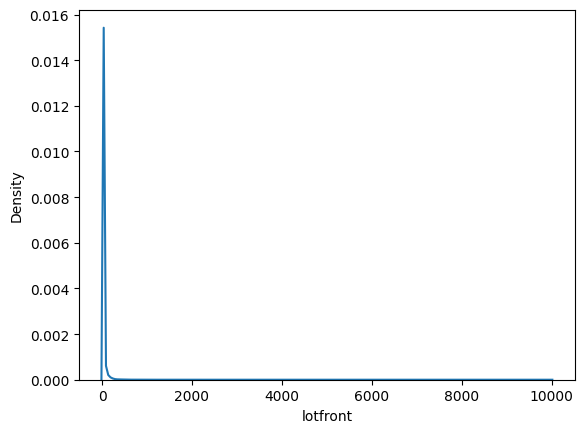

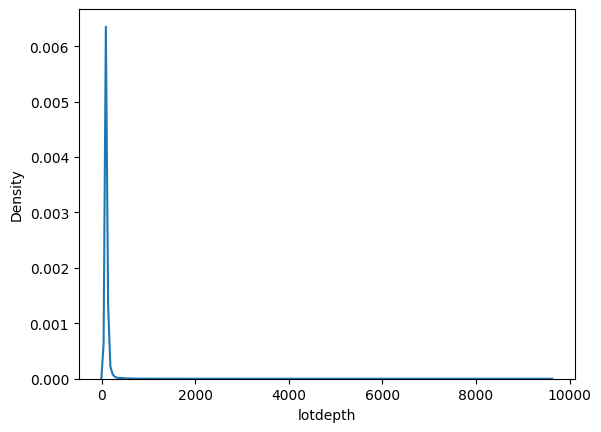

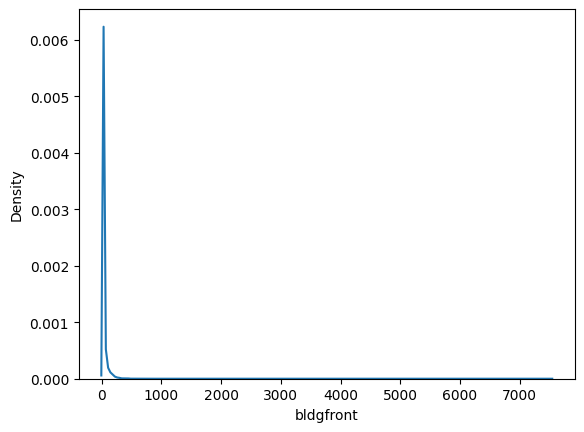

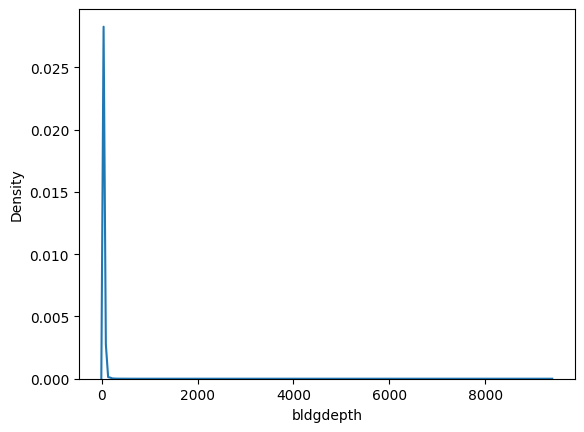

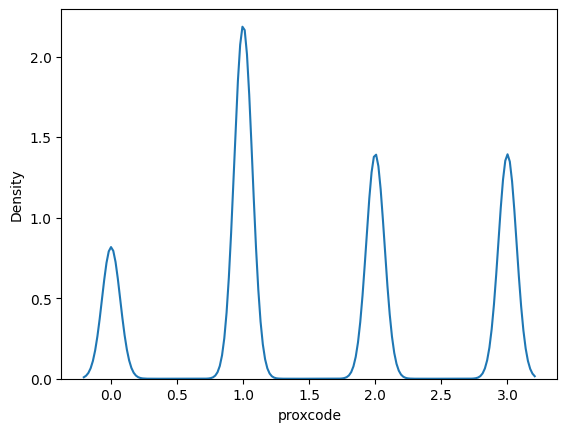

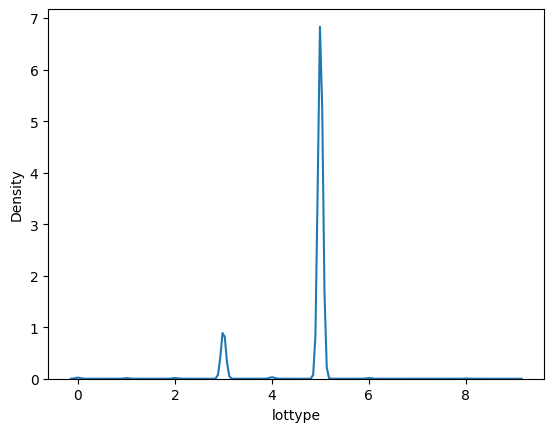

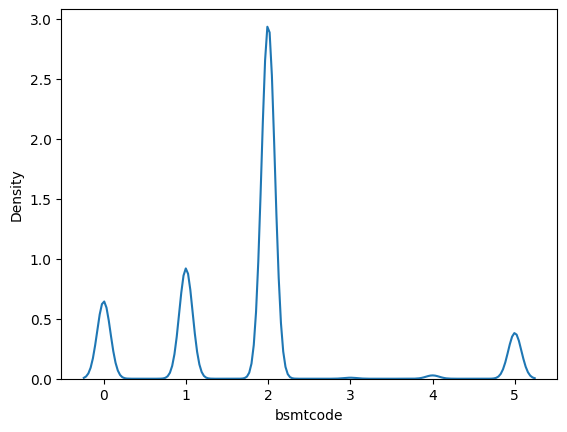

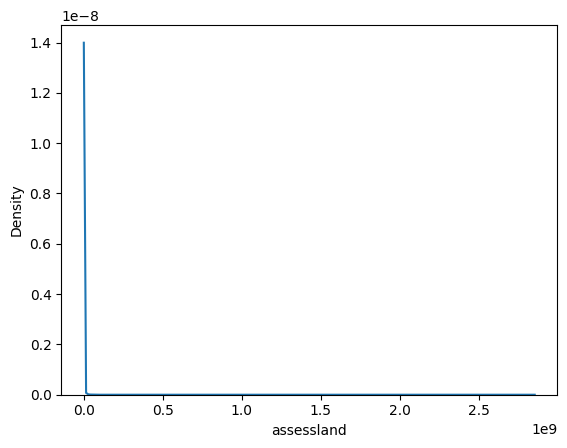

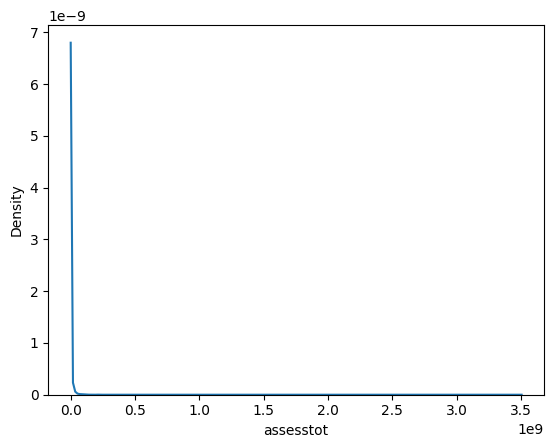

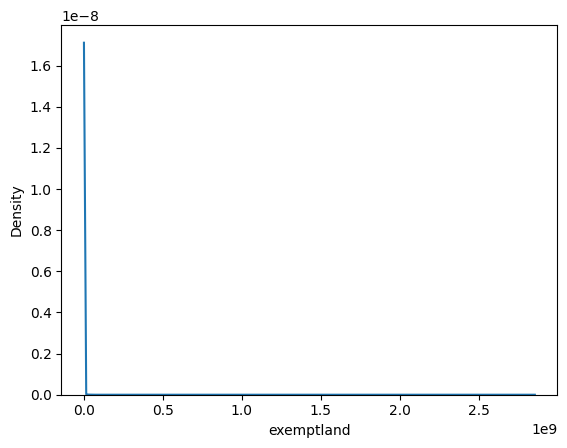

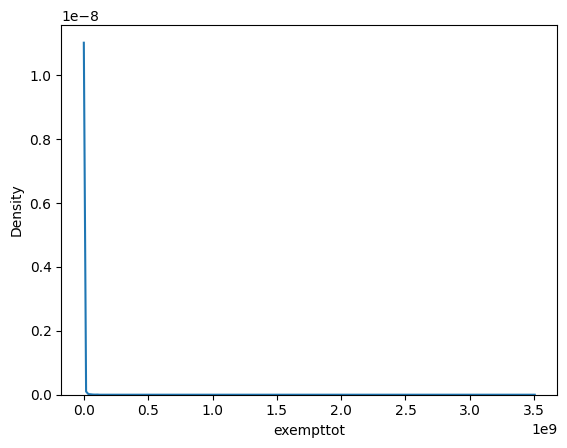

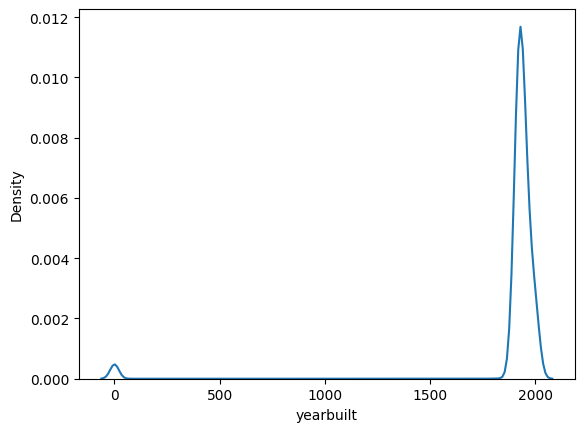

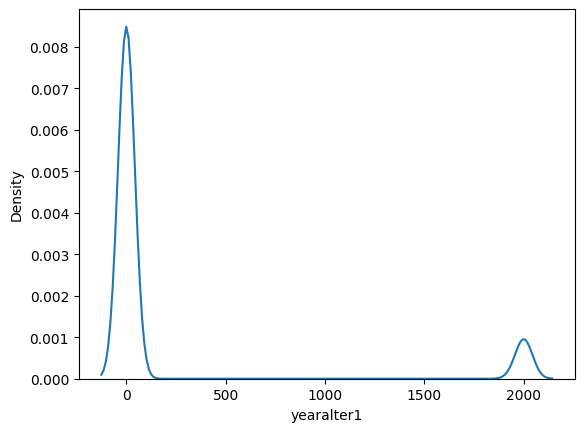

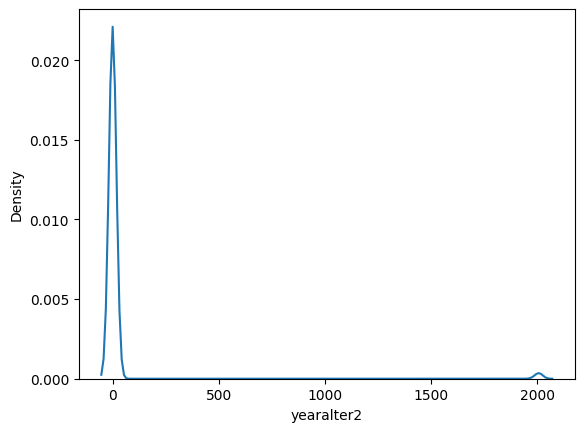

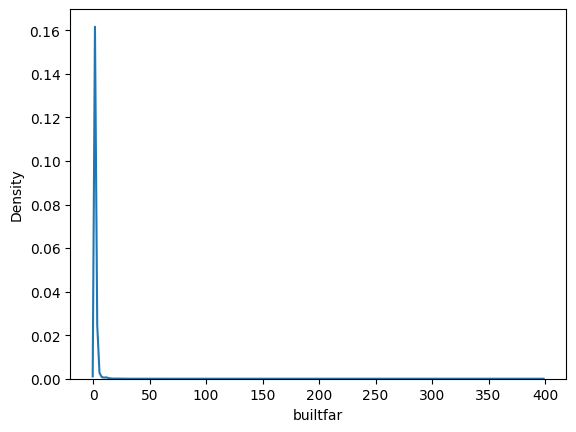

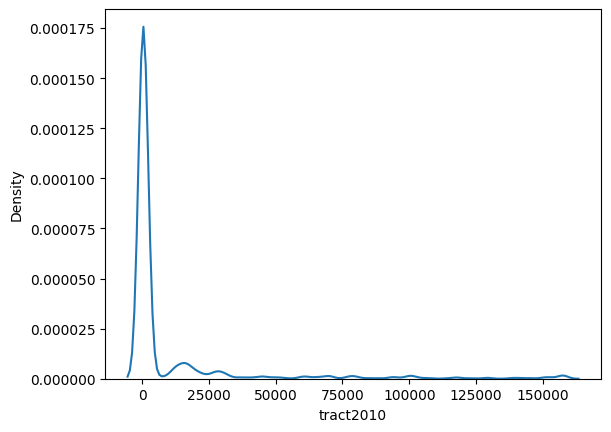

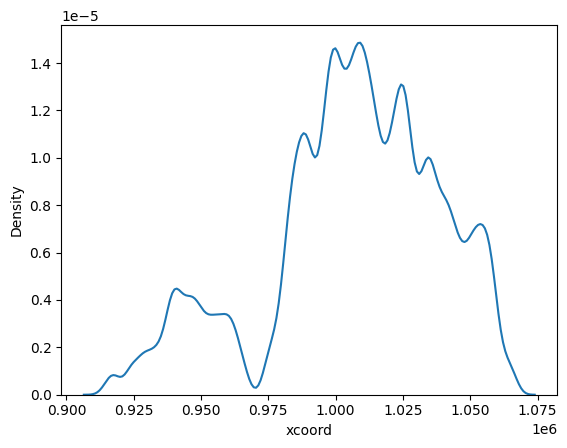

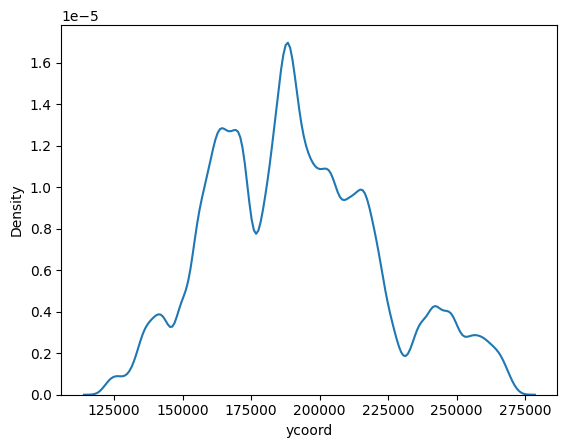

In [ ]:
feature_columns = data_cleaned.select_dtypes(include='number').columns
for column in feature_columns:
  plt.figure()
  sns.kdeplot(data_cleaned[column])

## Normalization


<h4>Following data cleaning, normalisation techniques are applied to enhance the performance of model
The dataset is comprised of two types of columns: numerical and alphanumeric. Distinct techniques are applied to normalize each type</h4>
<h3>For Numerical Data</h3>
<h4>Initially, the outlier percentage is computed for each feature. After analysing data (min, max, mean, std) and experimenting with various normalization techniques (minmax, z-score, robust), normalisation is done using robust scalling, its a powerful scalling technique to handle imbalanced feature data</h4>

<h3>For Alpha Numerical Data</h3>
<h4>All values in alphanumeric features are transformed to lowercase for consistency</h4>

In [ ]:
numerical_columns = data_cleaned.select_dtypes(include='number').columns

In [ ]:
# Count of unique values per column to identify potential numerical features
unique_values = data_cleaned[numerical_columns].nunique()
descriptive_stats = data_cleaned[numerical_columns].describe()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(unique_values)
    print(descriptive_stats)

block                    13761
lot                       2067
schooldist                  32
council                     51
zipcode                    203
policeprct                  77
healthcenterdistrict        30
healtharea                 210
sanitboro                    5
sanitdistrict               21
landuse                     11
easements                    8
lotarea                  22850
bldgarea                 29460
comarea                  16287
resarea                  21722
officearea                6762
retailarea                7358
garagearea                2688
strgearea                 2758
factryarea                2598
otherarea                 6320
numbldgs                   106
numfloors                  150
unitstotal                 646
lotfront                 12111
lotdepth                 13086
bldgfront                 4419
bldgdepth                 4455
proxcode                     4
lottype                     10
bsmtcode                     6
assessla

<h4>Box Plots for Identifying Outliers</h4>

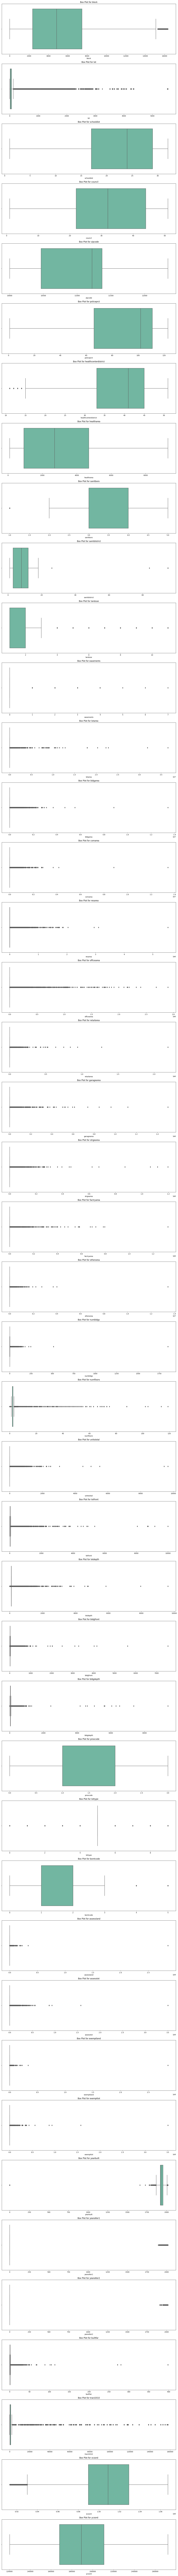

In [ ]:
num_rows = len(numerical_columns)
num_cols = 1

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data_cleaned[column], palette='Set2')
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculating Z score for each column values
z_scores = zscore(data_cleaned[numerical_columns])

# Threshold for outlier
threshold = 5

# Outliers for each column
outliers = (abs(z_scores) > threshold)

# Calculating percentage of outliers for each column
outliers_percentage_per_column = (outliers.sum() / len(data_cleaned)) * 100

print("Percentage of outliers for each column:\n")
print(outliers_percentage_per_column)


Percentage of outliers for each column:

block                   0.000000
lot                     0.508229
schooldist              0.000000
council                 0.000000
zipcode                 0.000000
policeprct              0.000000
healthcenterdistrict    0.000000
healtharea              0.000000
sanitboro               0.000000
sanitdistrict           0.001062
landuse                 0.000000
easements               0.367442
lotarea                 0.052340
bldgarea                0.289766
comarea                 0.171281
resarea                 0.326177
officearea              0.135022
retailarea              0.108169
garagearea              0.092391
strgearea               0.111962
factryarea              0.129409
otherarea               0.092998
numbldgs                0.043541
numfloors               0.521579
unitstotal              0.227262
lotfront                0.397480
lotdepth                0.417354
bldgfront               0.651595
bldgdepth               0.201623
pr

In [ ]:
#shortlisting columns with 0 outlier percentage
columns_with_zero_outliers = outliers_percentage_per_column[outliers_percentage_per_column == 0].index

print("Columns with 0% outliers:")
print(columns_with_zero_outliers)

Columns with 0% outliers:
Index(['block', 'schooldist', 'council', 'zipcode', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'landuse',
       'proxcode', 'bsmtcode', 'yearalter1', 'xcoord', 'ycoord'],
      dtype='object')


<p></p>

<h4>The upcoming code cells illustrate the normalization process applied to the dataset. Robust scaling, is employed based on
<ul>
<li>Initially, a hybrid approach combining min-max scaling for balanced features and robust scaling for imbalanced features was employed</li>
<li>Upon reviewing correlation metrics and feature importance through ensemble methods, it was noticed that certain significant features were losing their importance</li>
</ul></h4>


In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Initialize scalers
robust_scaler = RobustScaler()


# Apply Robust scaling
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)


train_data_normalized = df_robust_scaled.copy(deep=True)
# Display the normalized DataFrame
print("Normalized DataFrame:")
print(train_data_normalized)


Normalized DataFrame:
           block       lot  schooldist   council   zipcode  policeprct  \
0      -0.221003  0.604651   -1.333333 -0.636364 -0.828540   -1.311111   
1       2.149882  0.232558    0.250000 -0.045455  0.519912   -0.022222   
2       0.380486 -0.720930   -0.166667  0.727273  0.008850   -0.911111   
3      -0.817594 -0.186047   -0.750000  0.272727  0.012168   -0.666667   
4      -0.639107  2.627907    0.000000 -0.318182  0.168142    0.177778   
...          ...       ...         ...       ...       ...         ...   
659147  1.821513 -0.209302    0.250000  0.000000  0.213496    0.088889   
659148 -0.667320  2.767442   -0.666667  0.409091  0.013274   -0.644444   
659149  0.900470  2.558140    0.333333 -0.181818  0.219027    0.000000   
659150 -0.360110  0.418605    0.000000 -0.090909  0.174779    0.044444   
659151  0.007641  0.511628   -0.583333  0.363636  0.005531   -0.777778   

        healthcenterdistrict  healtharea  sanitboro  sanitdistrict  ...  \
0             

<h4>Following cell give details on minmax and robust scalling combination for normalization used while experimentation</h4>

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler

# # Separate columns for Min-Max scaling and Robust scaling
# columns_minmax = columns_with_zero_outliers
# columns_robust = [col for col in numerical_columns if col not in columns_with_zero_outliers]

# # Initialize scalers
# minmax_scaler = MinMaxScaler()
# robust_scaler = RobustScaler()

# # Apply Min-Max scaling
# df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(data_cleaned[columns_minmax]), columns=columns_minmax)

# # Apply Robust scaling
# df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data_cleaned[columns_robust]), columns=columns_robust)

# # Combine the results
# train_data_normalized = pd.concat([df_minmax_scaled, df_robust_scaled], axis=1)

# # Display the normalized DataFrame
# print("Normalized DataFrame:")
# print(train_data_normalized)


Normalized DataFrame:
           block  schooldist  council   zipcode  policeprct  \
0       0.227292    0.225806     0.34  0.200939    0.344262   
1       0.967460    0.838710     0.60  0.720990    0.819672   
2       0.415071    0.677419     0.94  0.523891    0.491803   
3       0.041042    0.451613     0.74  0.525171    0.581967   
4       0.096764    0.741935     0.48  0.585324    0.893443   
...          ...         ...      ...       ...         ...   
659147  0.864946    0.838710     0.62  0.602816    0.860656   
659148  0.087956    0.483871     0.80  0.525597    0.590164   
659149  0.577405    0.870968     0.54  0.604949    0.827869   
659150  0.183864    0.741935     0.58  0.587884    0.844262   
659151  0.298673    0.516129     0.78  0.522611    0.540984   

        healthcenterdistrict  healtharea  sanitboro  landuse  proxcode  ...  \
0                      0.375    0.317391       0.25      0.0  0.666667  ...   
1                      0.850    0.402174       0.75      0.0  0

<h2>Analysis of Normalised data</h2>

In [ ]:
# Count of unique values per column to identify potential categorical features
unique_values_normalized = train_data_normalized[numerical_columns].nunique()
descriptive_stats_normalized = train_data_normalized[numerical_columns].describe()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(unique_values_normalized)
    print(descriptive_stats_normalized)

block                    13761
lot                       2067
schooldist                  32
council                     51
zipcode                    203
policeprct                  77
healthcenterdistrict        30
healtharea                 210
sanitboro                    5
sanitdistrict               21
landuse                     11
easements                    8
lotarea                  22850
bldgarea                 29460
comarea                  16287
resarea                  21722
officearea                6762
retailarea                7358
garagearea                2688
strgearea                 2758
factryarea                2598
otherarea                 6320
numbldgs                   106
numfloors                  150
unitstotal                 646
lotfront                 12111
lotdepth                 13086
bldgfront                 4419
bldgdepth                 4455
proxcode                     4
lottype                     10
bsmtcode                     6
assessla

In [ ]:
train_data_normalized

block       lot  schooldist   council   zipcode  policeprct  \
0      -0.221003  0.604651   -1.333333 -0.636364 -0.828540   -1.311111   
1       2.149882  0.232558    0.250000 -0.045455  0.519912   -0.022222   
2       0.380486 -0.720930   -0.166667  0.727273  0.008850   -0.911111   
3      -0.817594 -0.186047   -0.750000  0.272727  0.012168   -0.666667   
4      -0.639107  2.627907    0.000000 -0.318182  0.168142    0.177778   
...          ...       ...         ...       ...       ...         ...   
659147  1.821513 -0.209302    0.250000  0.000000  0.213496    0.088889   
659148 -0.667320  2.767442   -0.666667  0.409091  0.013274   -0.644444   
659149  0.900470  2.558140    0.333333 -0.181818  0.219027    0.000000   
659150 -0.360110  0.418605    0.000000 -0.090909  0.174779    0.044444   
659151  0.007641  0.511628   -0.583333  0.363636  0.005531   -0.777778   

        healthcenterdistrict  healtharea  sanitboro  sanitdistrict  ...  \
0                  -1.250000    0.082011       -2.0       0.111111  ...   
1                   0.333333    0.288360        0.0       0.666667  ...   
2                  -0.500000    1.219577       -1.0       0.777778  ...   
3                  -0.166667    0.447090       -1.0      -0.111111  ...   
4                   0.083333   -0.341270        0.0      -0.444444  ...   
...                      ...         ...        ...            ...  ...   
659147              0.333333    0.238360        0.0       0.222222  ...   
659148             -0.750000    0.658730       -1.0       0.888889  ...   
659149              0.333333    0.132275        0.0       0.111111  ...   
659150              0.416667   -0.234921        0.0      -0.333333  ...   
659151             -0.500000    0.743386       -1.0       1.000000  ...   

        assesstot  exemptland  exempttot  yearbuilt  yearalter1  yearalter2  \
0       -0.521683    0.000000   0.000000   0.285714         0.0         0.0   
1       -1.175279    0.000000   0.000000   0.000000         0.0         0.0   
2        1.112006    1.000000   1.000000   0.000000         0.0         0.0   
3       -0.480048    0.000000   0.000000  -0.571429         0.0         0.0   
4        5.098762    0.000000   0.000000   1.085714         0.0         0.0   
...           ...         ...        ...        ...         ...         ...   
659147  -0.103566    2.183673   2.183673   0.000000         0.0         0.0   
659148  -0.119320    1.000000   8.796599   2.085714         0.0         0.0   
659149  -0.534363    1.000000   1.000000  -0.571429         0.0         0.0   
659150  -0.131091    1.000000   1.000000   0.285714         0.0         0.0   
659151  -0.196919    0.000000   0.000000   0.028571         0.0         0.0   

        builtfar   tract2010    xcoord    ycoord  
0      -0.164384   -0.487377  0.249741  1.183778  
1      -0.356164  109.012075  1.061161 -0.774990  
2      -0.068493    0.061471 -0.268413 -0.635013  
3       0.684932   -0.429199 -0.636818 -0.237695  
4       1.068493   -0.023052  0.237857  0.482818  
...          ...         ...       ...       ...  
659147 -0.452055    0.430296  0.532814 -0.184689  
659148  0.616438   -0.207464 -0.048495 -0.088514  
659149  0.246575   -0.377607  0.613807  0.070246  
659150 -0.082192    0.203074  0.261373  0.280141  
659151  0.904110    0.364435 -0.269094 -0.303011  

[659152 rows x 43 columns]

<h3>Graphs showing distribution of numerical data after normalisation</h3>
<h4>These plots visualize the distribution of normalised numerical data, allowing for an analysis of the data's shape and central tendency</h4>

<ipython-input-72-4803de87e5b8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


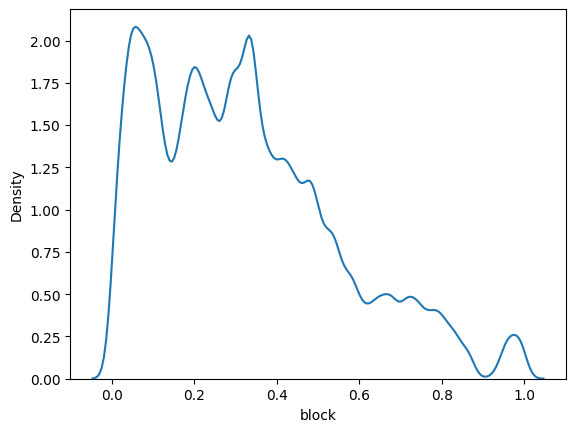

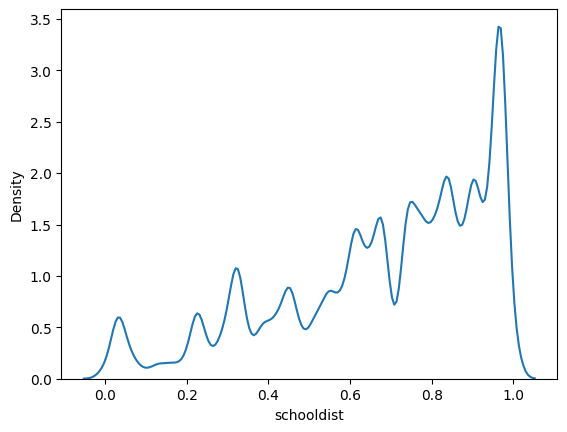

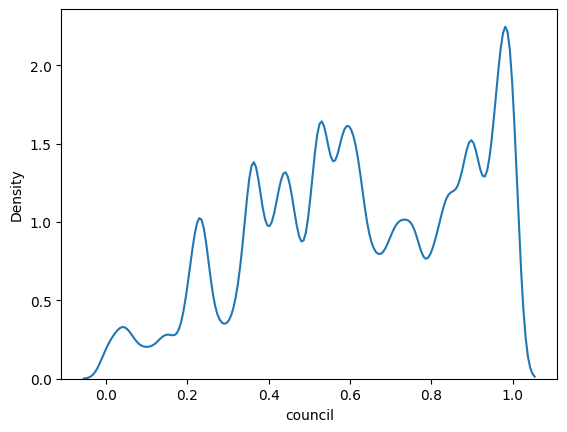

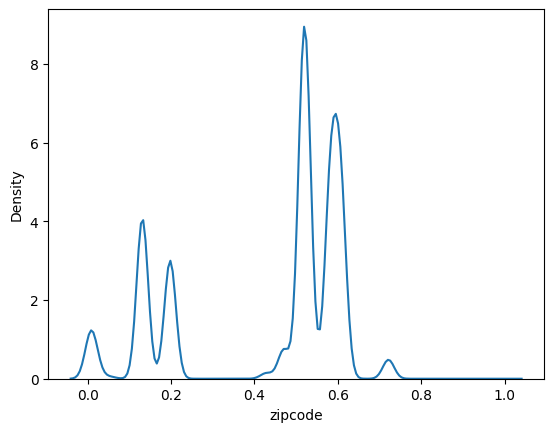

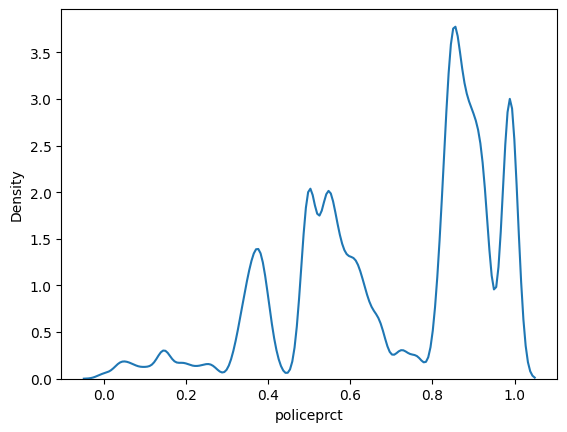

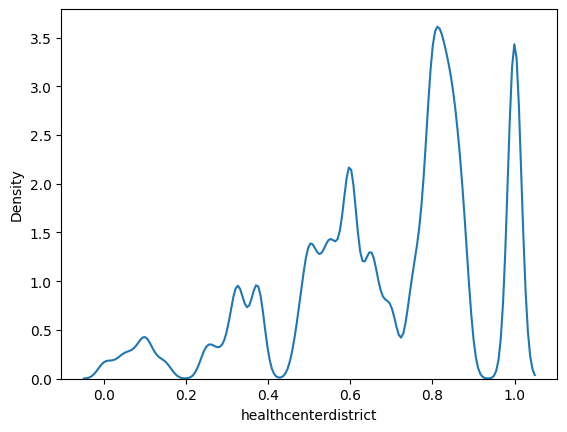

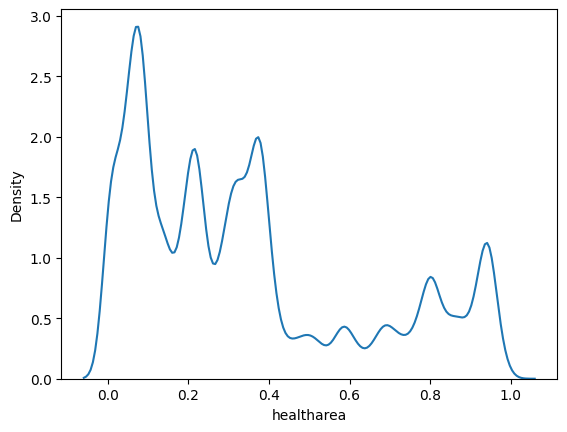

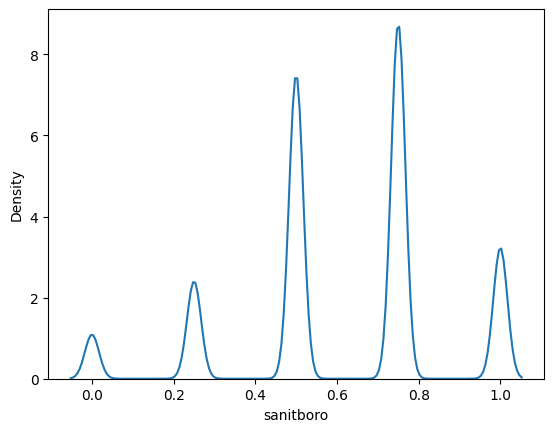

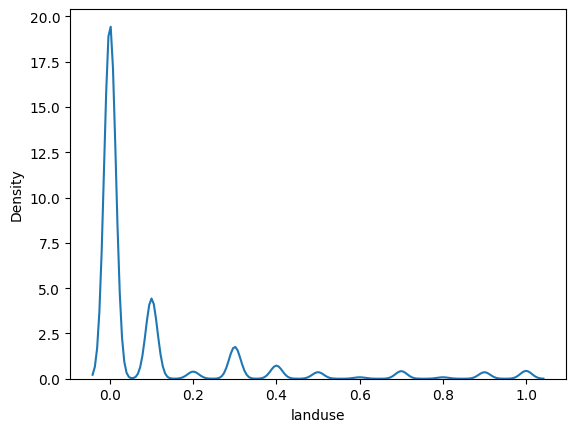

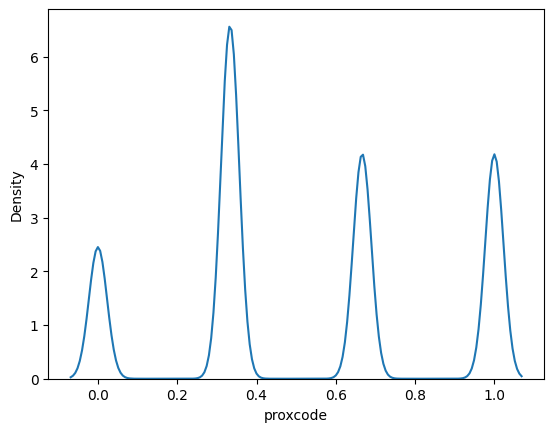

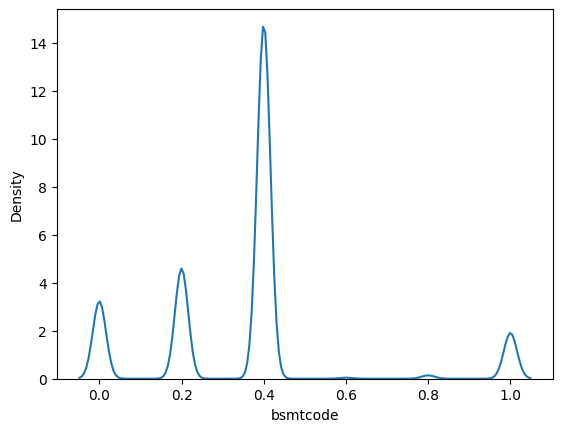

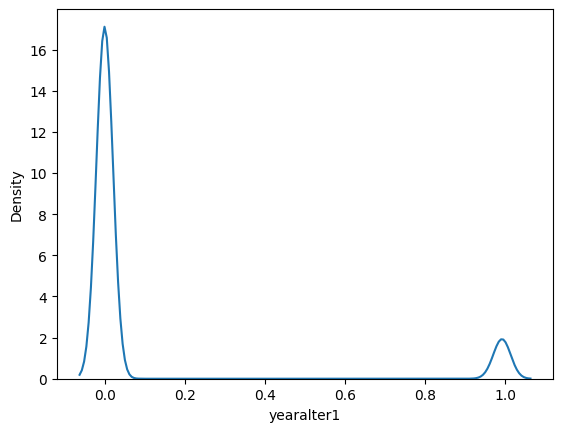

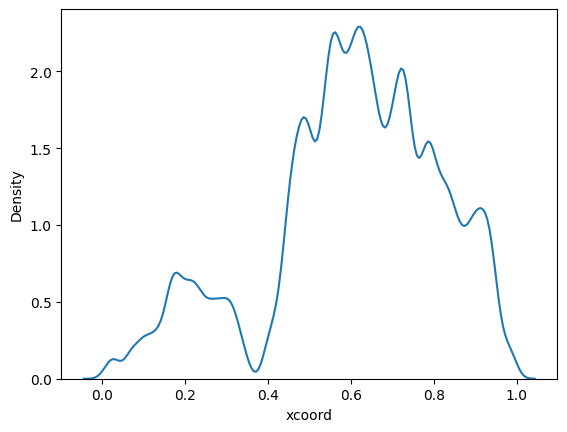

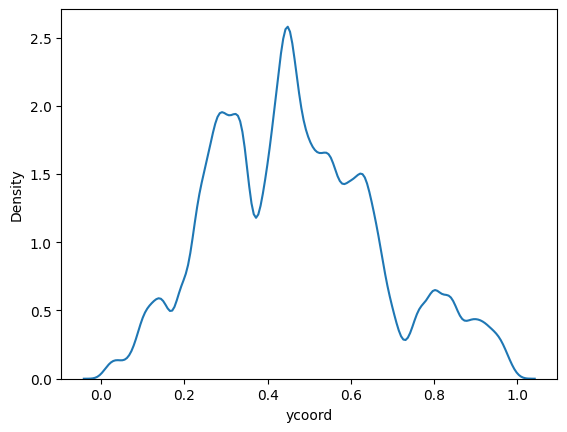

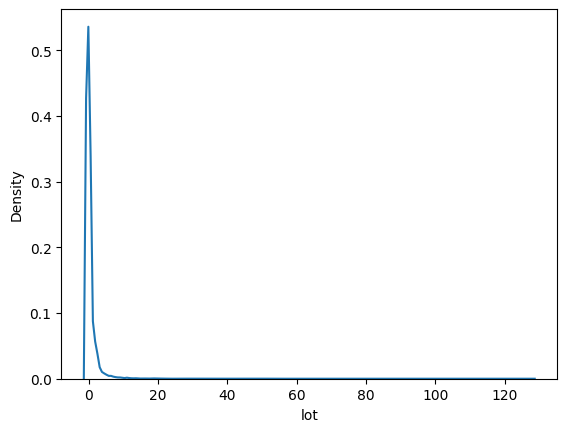

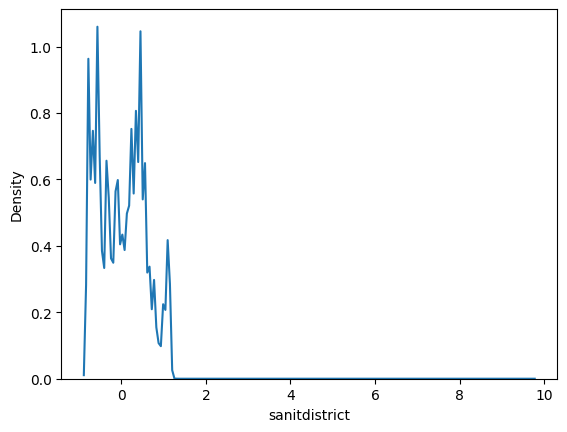

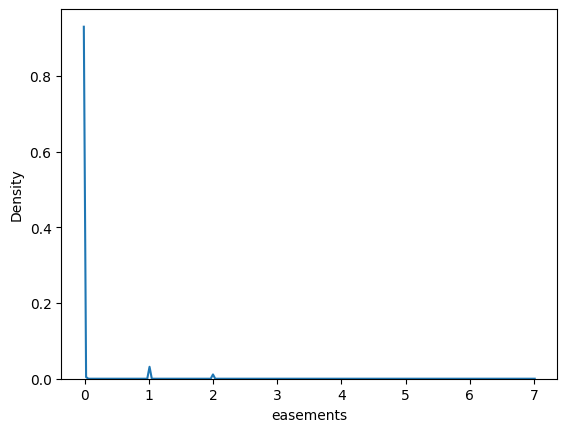

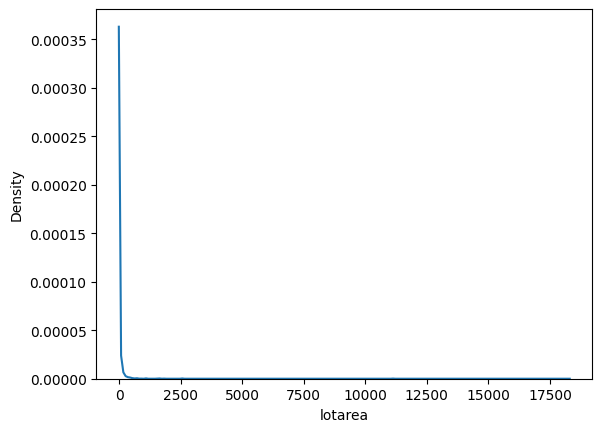

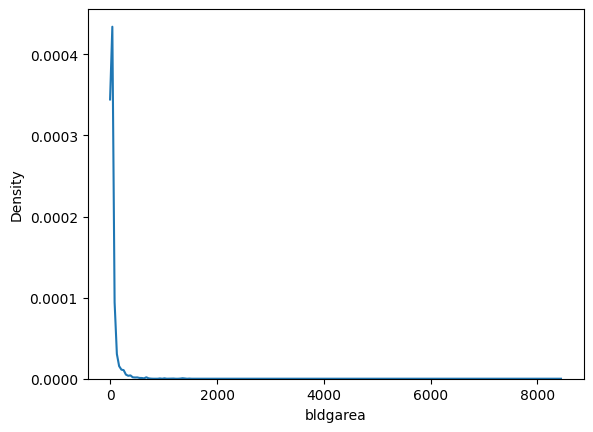

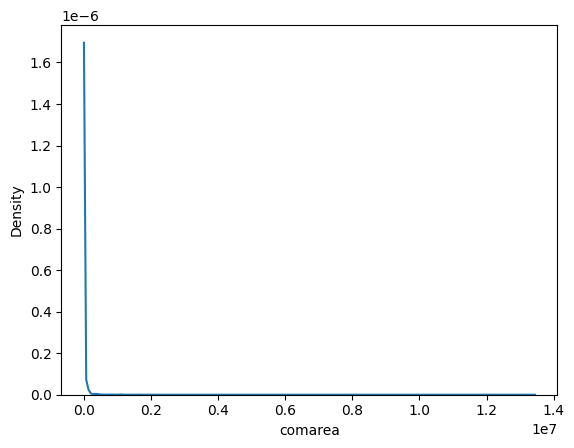

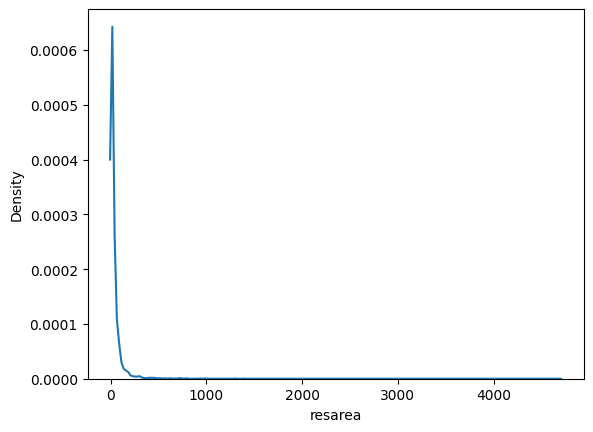

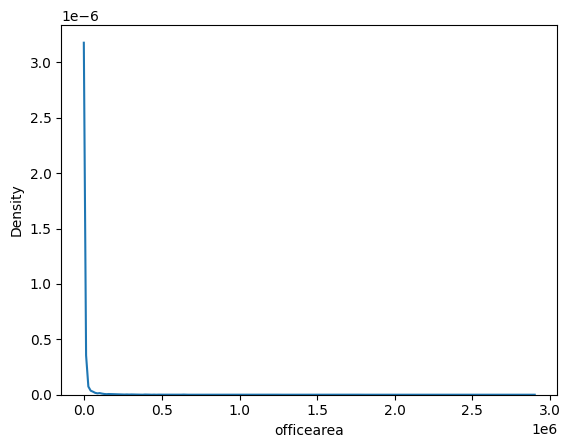

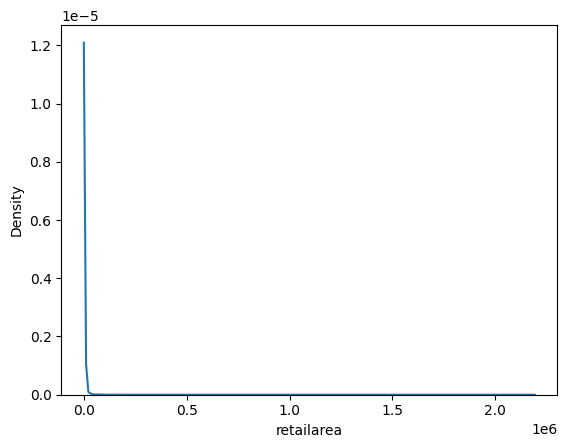

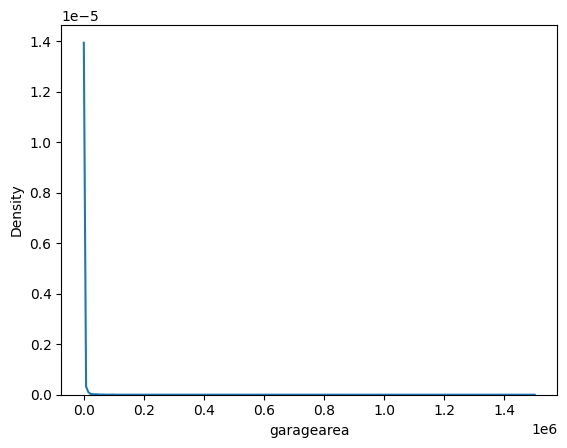

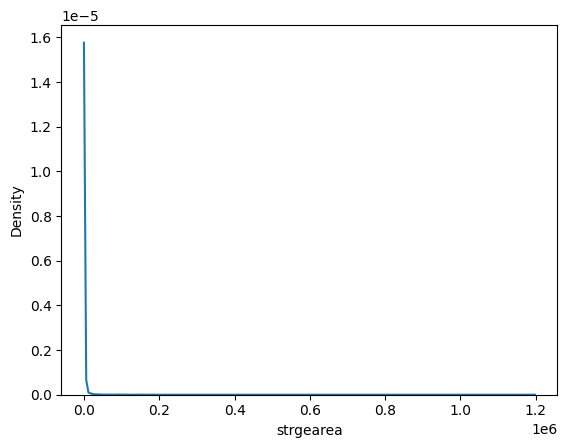

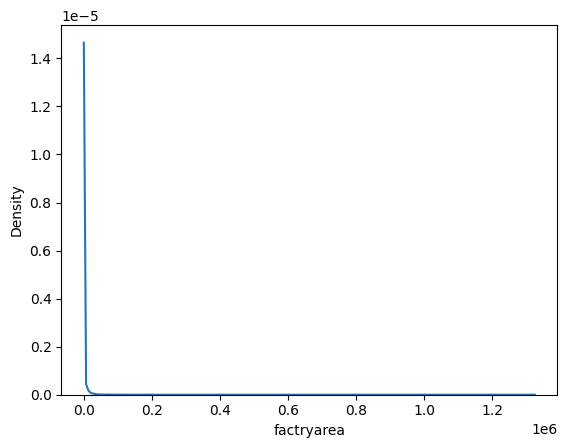

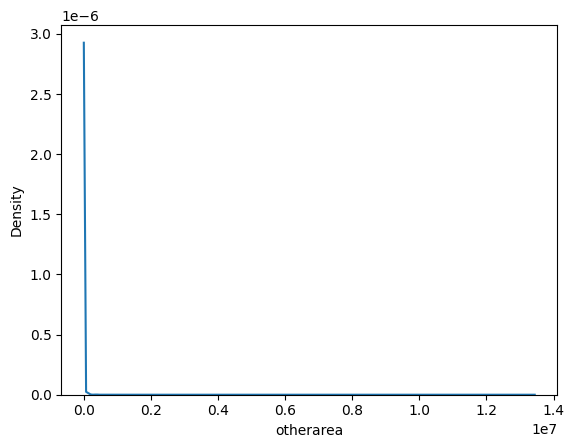

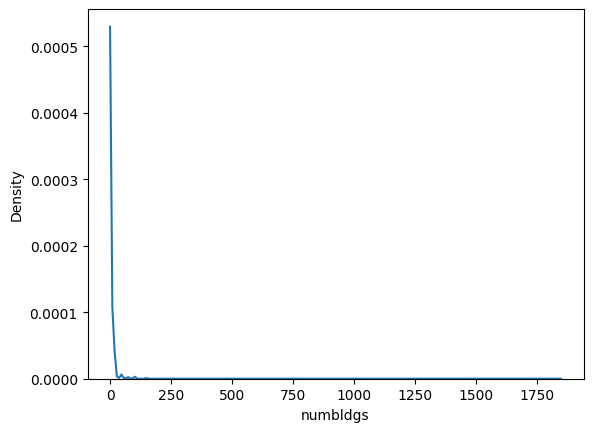

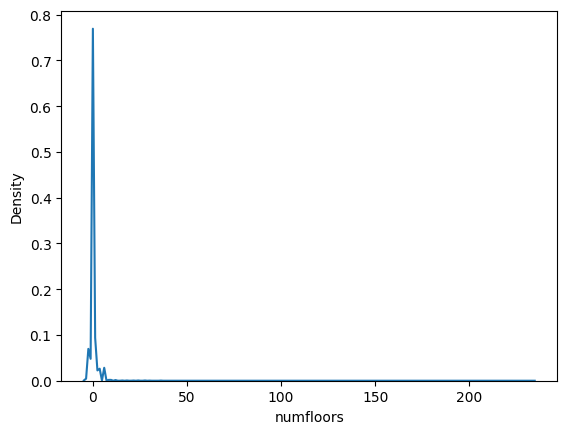

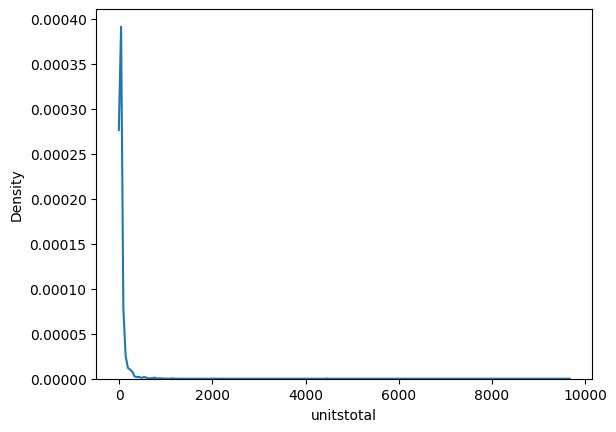

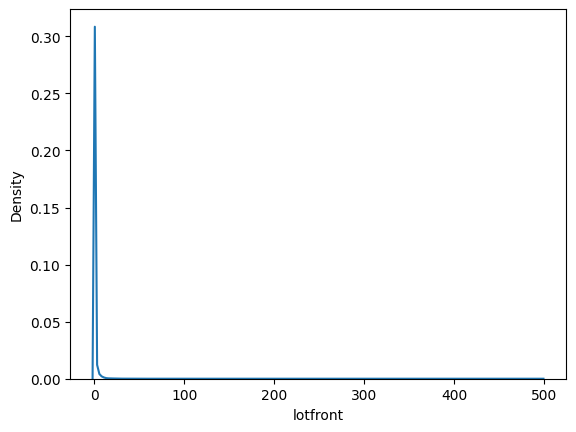

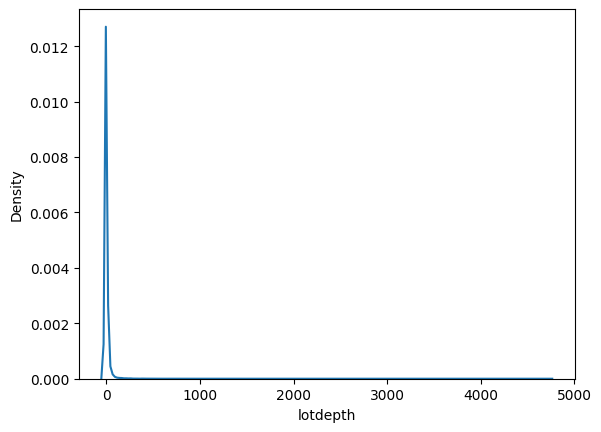

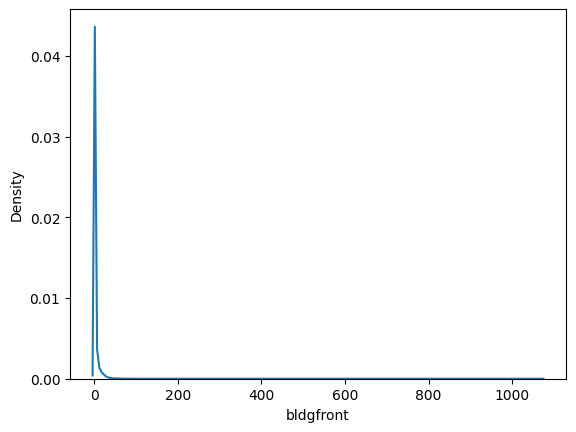

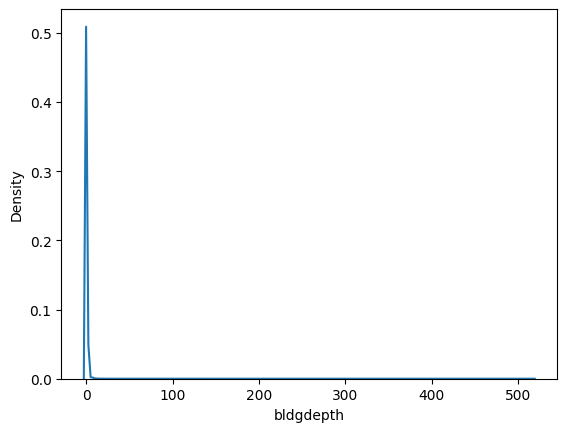

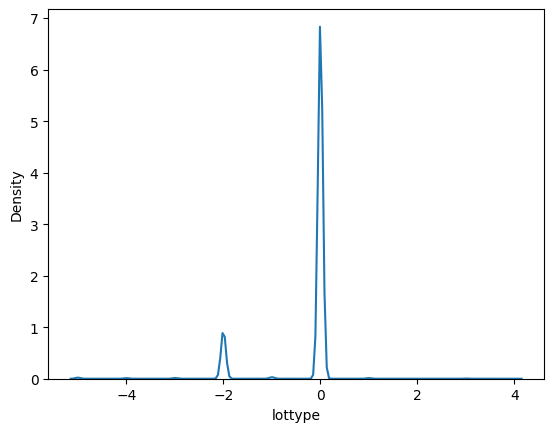

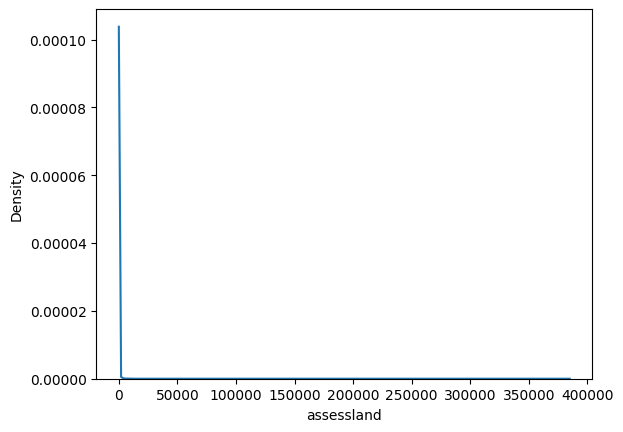

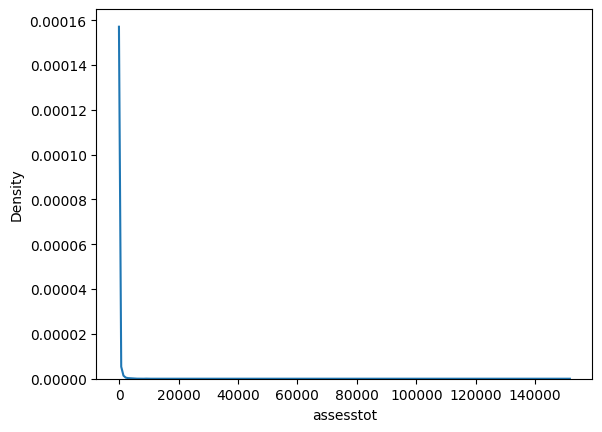

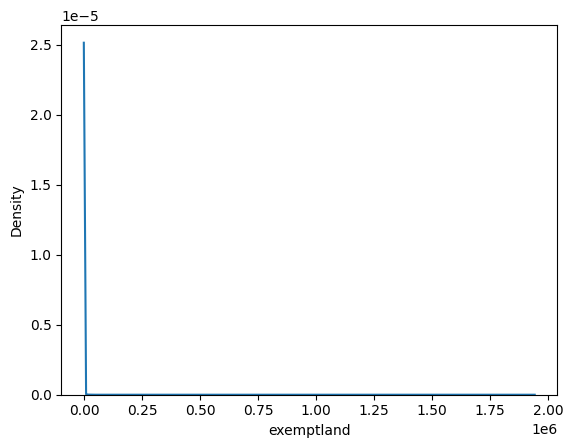

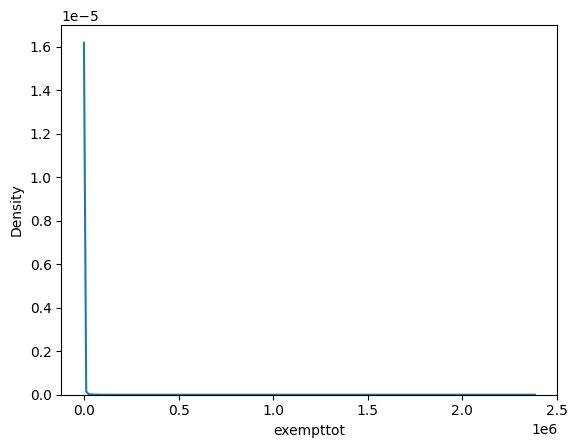

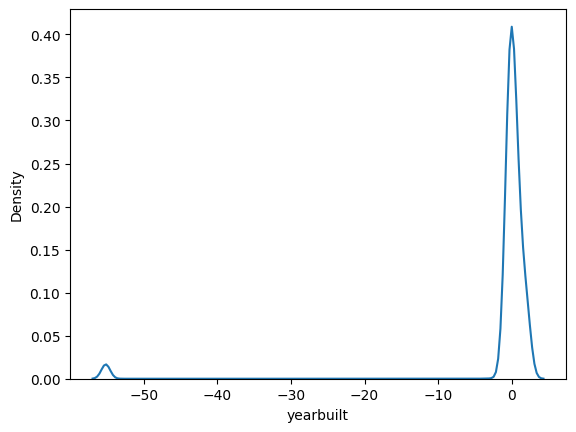

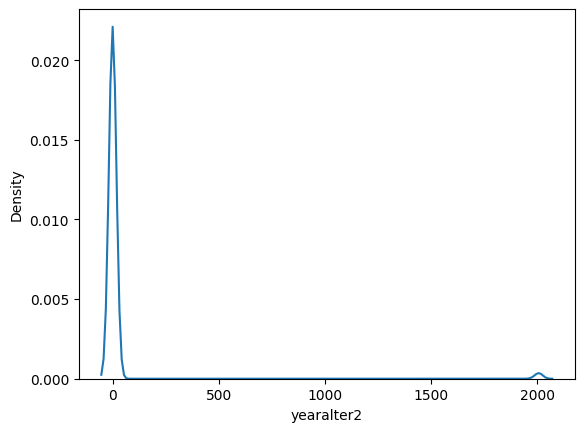

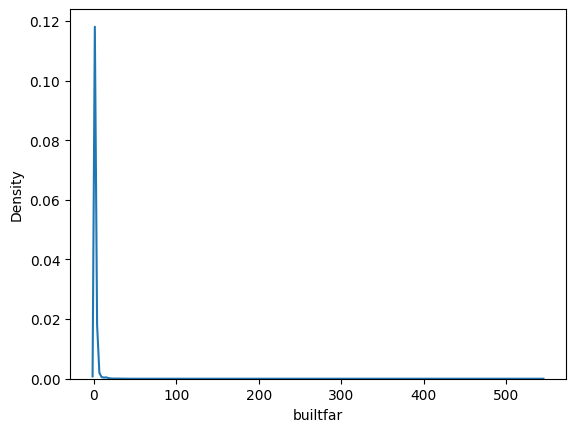

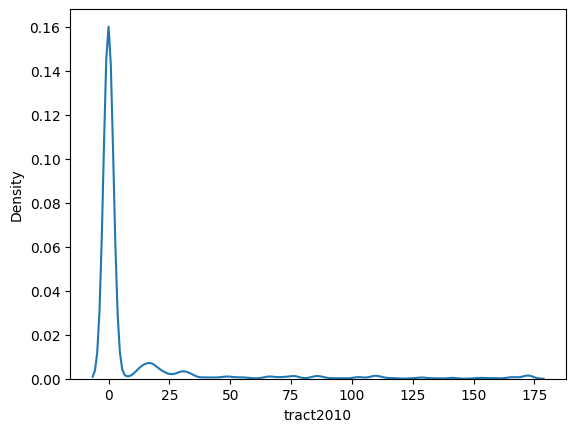

In [ ]:
feature_columns = train_data_normalized.columns
for column in feature_columns:
  plt.figure()
  sns.kdeplot(train_data_normalized[column])

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659152 entries, 574546 to 460554
Data columns (total 51 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               659152 non-null  object 
 1   block                 659152 non-null  int64  
 2   lot                   659152 non-null  int64  
 3   schooldist            659152 non-null  float64
 4   council               659152 non-null  float64
 5   zipcode               659152 non-null  float64
 6   firecomp              659152 non-null  object 
 7   policeprct            659152 non-null  float64
 8   healthcenterdistrict  659152 non-null  float64
 9   healtharea            659152 non-null  float64
 10  sanitboro             659152 non-null  float64
 11  sanitdistrict         659152 non-null  float64
 12  sanitsub              659152 non-null  object 
 13  zonedist1             659152 non-null  object 
 14  splitzone             659152 non-null  object 


<h2>Pre Processing On categorical data</h2>

In [ ]:
# Identifying columns with dtype 'object' (categorical columns)
object_columns = data_cleaned.select_dtypes(include=['object']).columns

object_columns

Index(['borough', 'firecomp', 'sanitsub', 'zonedist1', 'splitzone',
       'irrlotcode', 'zonemap'],
      dtype='object')

In [ ]:
# calculate the unique values count in the cleaned data
unique_values_count_cleaned = data_cleaned.select_dtypes(include=['object']).nunique()
unique_values_count_cleaned

borough         5
firecomp      348
sanitsub       60
zonedist1     161
splitzone       2
irrlotcode      2
zonemap       125
dtype: int64

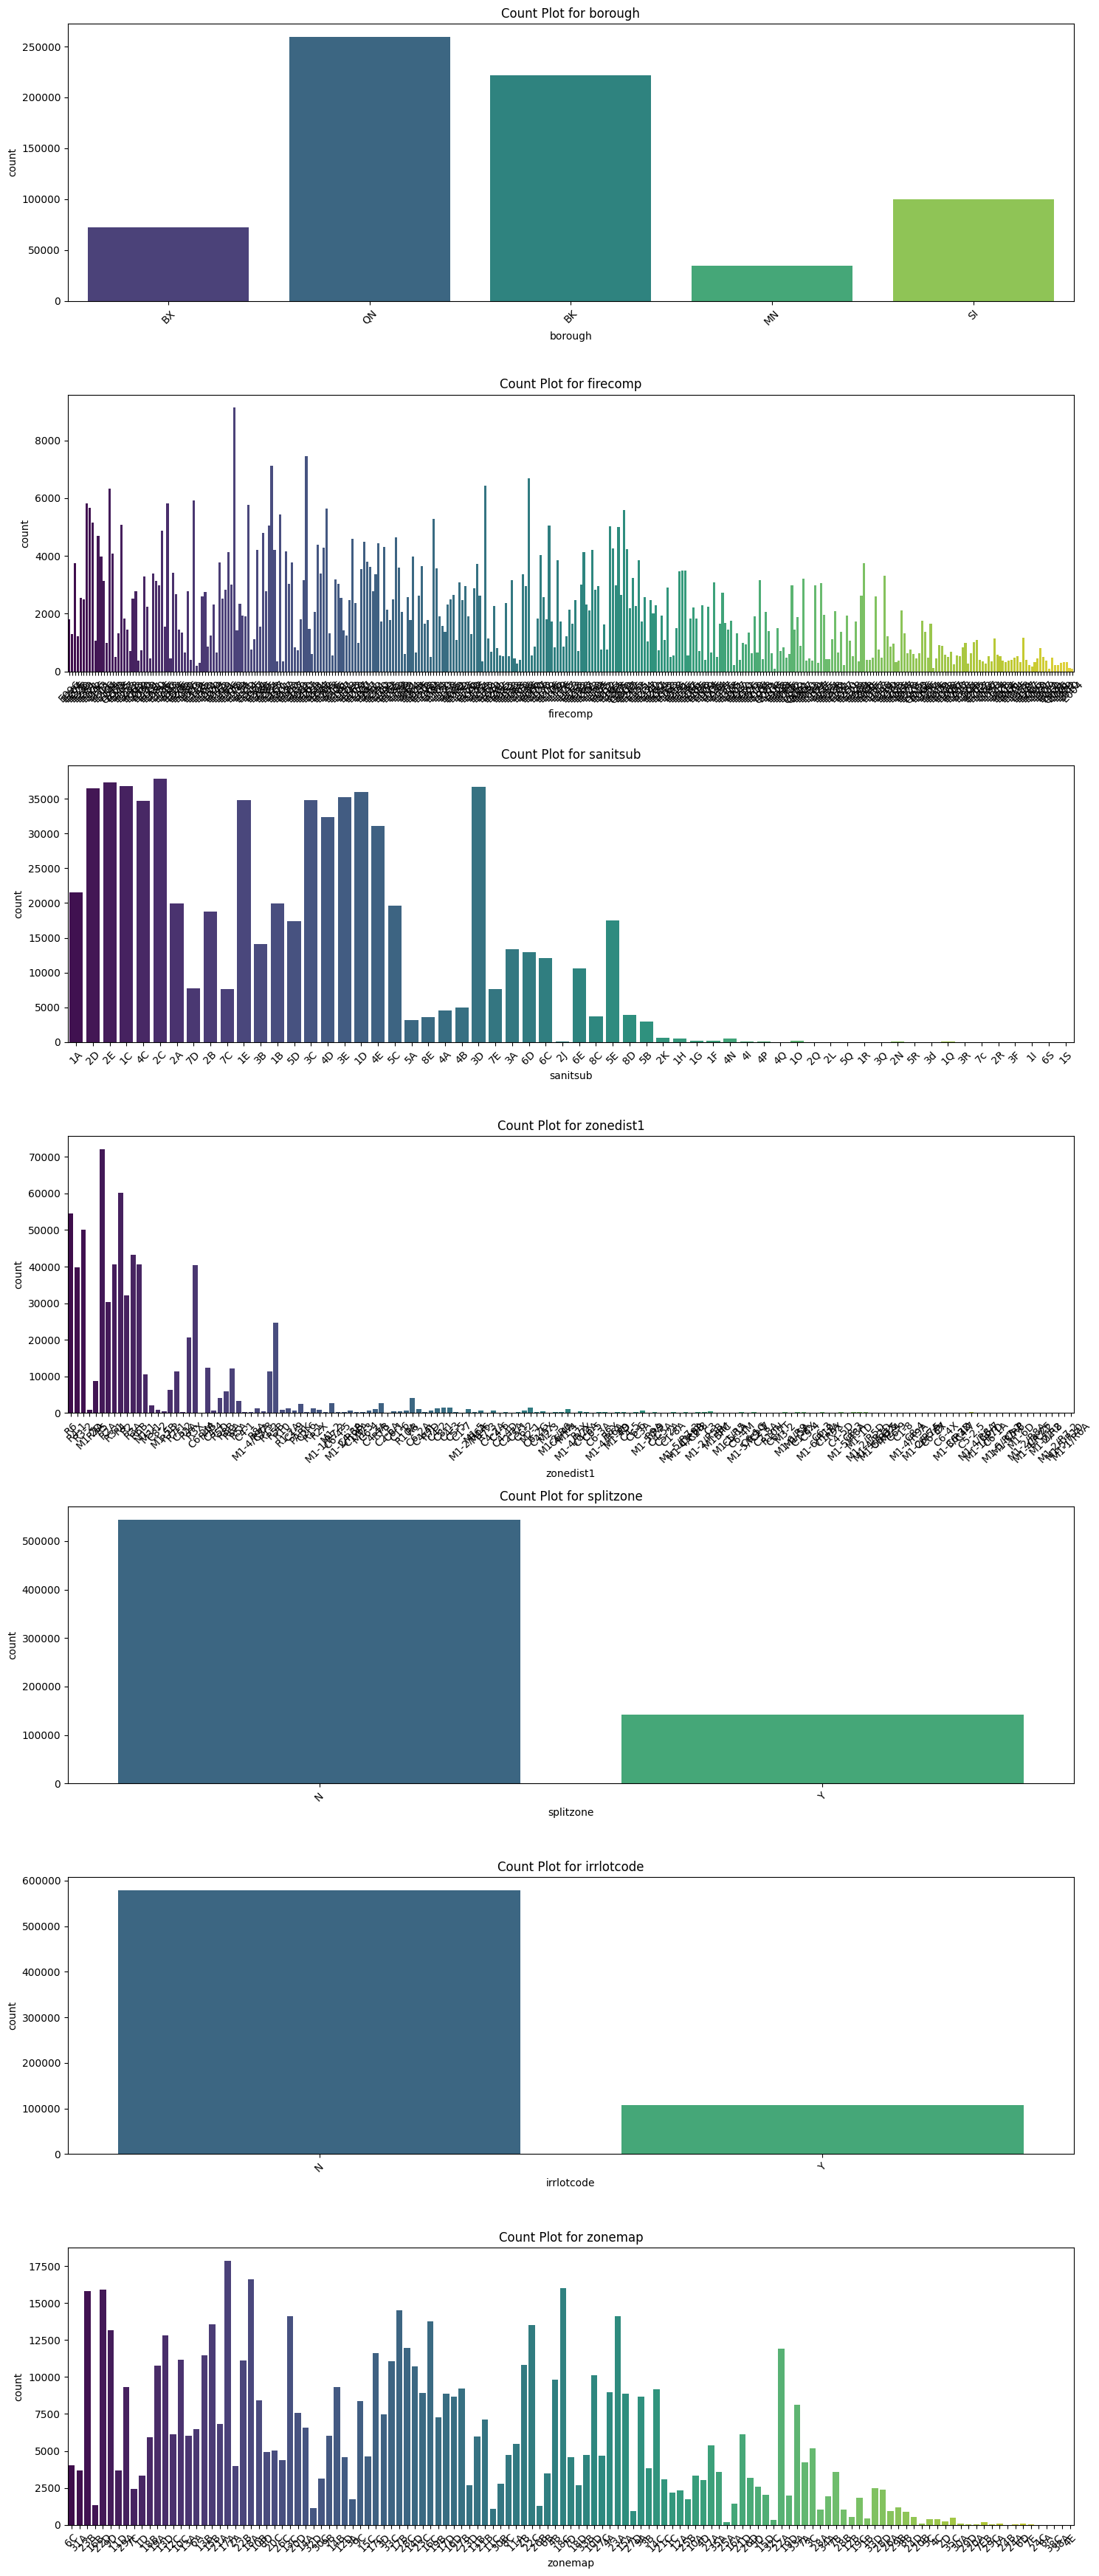

In [ ]:
num_rows = len(object_columns)
num_cols = 1

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(object_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, data=train_data_cleaned, palette='viridis')
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Reviewing content of categorical data

In [ ]:
print(data_cleaned['borough'].unique(), '\n--\n')
print(data_cleaned['splitzone'].unique(), '\n--\n')
print(data_cleaned['irrlotcode'].unique(), '\n--\n')
print(data_cleaned['firecomp'].unique(), '\n--\n')
print(data_cleaned['sanitsub'].unique(), '\n--\n')
print(data_cleaned['zonedist1'].unique(), '\n--\n')
print(data_cleaned['zonemap'].unique(), '\n--\n')

['BX' 'QN' 'BK' 'MN' 'SI'] 
--

['N' 'Y'] 
--

['N' 'Y'] 
--

['E096' 'E264' 'E276' 'E228' 'E289' 'E251' 'E321' 'E072' 'L046' 'L173'
 'E311' 'E286' 'L104' 'L144' 'Q288' 'L023' 'E218' 'L165' 'E157' 'E233'
 'L048' 'E063' 'E242' 'L009' 'L030' 'E293' 'L129' 'E001' 'E331' 'L080'
 'E154' 'L136' 'E216' 'L083' 'E324' 'L076' 'E259' 'E050' 'L086' 'L003'
 'E319' 'L118' 'E095' 'L168' 'E312' 'L011' 'L120' 'L079' 'E045' 'E162'
 'E249' 'E166' 'E315' 'L170' 'E239' 'L154' 'L121' 'E222' 'E314' 'L115'
 'L037' 'E304' 'E280' 'L085' 'E285' 'E284' 'E323' 'L167' 'E021' 'E301'
 'E037' 'L133' 'E160' 'E313' 'L137' 'E039' 'E062' 'E240' 'E167' 'E224'
 'E053' 'L041' 'E274' 'L047' 'E302' 'E295' 'L078' 'L016' 'E306' 'E161'
 'E097' 'L151' 'L103' 'E248' 'L162' 'E219' 'E227' 'L107' 'L081' 'E247'
 'L051' 'E241' 'E320' 'L112' 'E299' 'L163' 'E155' 'L159' 'L158' 'L039'
 'L049' 'L061' 'E064' 'E303' 'E024' 'L135' 'E310' 'E298' 'L160' 'L034'
 'L082' 'E164' 'L132' 'L130' 'L123' 'L050' 'E225' 'E089' 'E082' 'E159'
 'L153' 'E282' 

In [ ]:
# Coverting all categorical columns to lower case
data_cleaned[object_columns] = data_cleaned[object_columns].apply(lambda x: x.astype(str).str.lower())

<h2>Categorical Features Encoding</h2>

<ul>
<li>One Hot Encoding: Encoding applied on features with less than 5 unique values</li>
<li>Label Encoding: Encoding applied on features with more than 5 uniques values. This is to limit the number of dimension, to keep model performance optimized</li>
</ul>



In [ ]:
# Columns for label encoding and one-hot encoding based on the cleaned data
label_encoding_columns_cleaned = unique_values_count_cleaned[unique_values_count_cleaned > 5].index.tolist()
one_hot_encoding_columns_cleaned = unique_values_count_cleaned[unique_values_count_cleaned <= 5].index.tolist()

# Label Encoding for columns with more than 5 unique values
for col in label_encoding_columns_cleaned:
    data_cleaned[col] = LabelEncoder().fit_transform(data_cleaned[col])

# One-Hot Encoding for columns with 5 or fewer unique values
data_cleaned = pd.get_dummies(data_cleaned, columns=one_hot_encoding_columns_cleaned)



In [ ]:
train_data_normalized.columns

Index(['block', 'lot', 'schooldist', 'council', 'zipcode', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'numbldgs', 'numfloors', 'unitstotal', 'lotfront',
       'lotdepth', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exemptland', 'exempttot', 'yearbuilt',
       'yearalter1', 'yearalter2', 'builtfar', 'tract2010', 'xcoord',
       'ycoord'],
      dtype='object')

Making sure both dataframes have same order of indexes

In [ ]:
data_cleaned.index = train_data_normalized.index
print("Original DataFrame index:", data_cleaned.index)
print("Normalized DataFrame index:", train_data_normalized.index)


Original DataFrame index: RangeIndex(start=0, stop=659152, step=1)
Normalized DataFrame index: RangeIndex(start=0, stop=659152, step=1)


Combining Categorical And Numerical Data to single dataframe for training

In [ ]:
data_cleaned[numerical_columns] = train_data_normalized.copy(deep=True)

In [ ]:
data_cleaned.isnull().sum()

block                   0
lot                     0
schooldist              0
council                 0
zipcode                 0
firecomp                0
policeprct              0
healthcenterdistrict    0
healtharea              0
sanitboro               0
sanitdistrict           0
sanitsub                0
zonedist1               0
landuse                 0
easements               0
lotarea                 0
bldgarea                0
comarea                 0
resarea                 0
officearea              0
retailarea              0
garagearea              0
strgearea               0
factryarea              0
otherarea               0
numbldgs                0
numfloors               0
unitstotal              0
lotfront                0
lotdepth                0
bldgfront               0
bldgdepth               0
proxcode                0
lottype                 0
bsmtcode                0
assessland              0
assesstot               0
exemptland              0
exempttot   

In [ ]:
data_cleaned

block       lot  schooldist   council   zipcode  firecomp  \
0      -0.221003  0.604651   -1.333333 -0.636364 -0.828540        69   
1       2.149882  0.232558    0.250000 -0.045455  0.519912       139   
2       0.380486 -0.720930   -0.166667  0.727273  0.008850       147   
3      -0.817594 -0.186047   -0.750000  0.272727  0.012168       108   
4      -0.639107  2.627907    0.000000 -0.318182  0.168142       158   
...          ...       ...         ...       ...       ...       ...   
659147  1.821513 -0.209302    0.250000  0.000000  0.213496       337   
659148 -0.667320  2.767442   -0.666667  0.409091  0.013274       340   
659149  0.900470  2.558140    0.333333 -0.181818  0.219027       346   
659150 -0.360110  0.418605    0.000000 -0.090909  0.174779       186   
659151  0.007641  0.511628   -0.583333  0.363636  0.005531       126   

        policeprct  healthcenterdistrict  healtharea  sanitboro  ...  \
0        -1.311111             -1.250000    0.082011       -2.0  ...   
1        -0.022222              0.333333    0.288360        0.0  ...   
2        -0.911111             -0.500000    1.219577       -1.0  ...   
3        -0.666667             -0.166667    0.447090       -1.0  ...   
4         0.177778              0.083333   -0.341270        0.0  ...   
...            ...                   ...         ...        ...  ...   
659147    0.088889              0.333333    0.238360        0.0  ...   
659148   -0.644444             -0.750000    0.658730       -1.0  ...   
659149    0.000000              0.333333    0.132275        0.0  ...   
659150    0.044444              0.416667   -0.234921        0.0  ...   
659151   -0.777778             -0.500000    0.743386       -1.0  ...   

        target__office  borough_bk  borough_bx  borough_mn  borough_qn  \
0                False           0           1           0           0   
1                False           0           0           0           1   
2                False           1           0           0           0   
3                False           1           0           0           0   
4                False           0           0           0           1   
...                ...         ...         ...         ...         ...   
659147           False           0           0           0           1   
659148           False           1           0           0           0   
659149           False           0           0           0           1   
659150           False           0           0           0           1   
659151           False           1           0           0           0   

        borough_si  splitzone_n  splitzone_y  irrlotcode_n  irrlotcode_y  
0                0            1            0             1             0  
1                0            1            0             1             0  
2                0            1            0             1             0  
3                0            1            0             1             0  
4                0            1            0             1             0  
...            ...          ...          ...           ...           ...  
659147           0            1            0             1             0  
659148           0            1            0             1             0  
659149           0            1            0             0             1  
659150           0            1            0             1             0  
659151           0            1            0             1             0  

[659152 rows x 57 columns]

In [ ]:
data_cleaned.columns

Index(['block', 'lot', 'schooldist', 'council', 'zipcode', 'firecomp',
       'policeprct', 'healthcenterdistrict', 'healtharea', 'sanitboro',
       'sanitdistrict', 'sanitsub', 'zonedist1', 'landuse', 'easements',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'proxcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exemptland', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'builtfar', 'tract2010', 'xcoord', 'ycoord', 'zonemap',
       'target__office', 'borough_bk', 'borough_bx', 'borough_mn',
       'borough_qn', 'borough_si', 'splitzone_n', 'splitzone_y',
       'irrlotcode_n', 'irrlotcode_y'],
      dtype='object')

<h4>Generating a correlation matrix to assess the relationships between all features, providing a comprehensive overview of the inter-feature correlations in the dataset</h4>

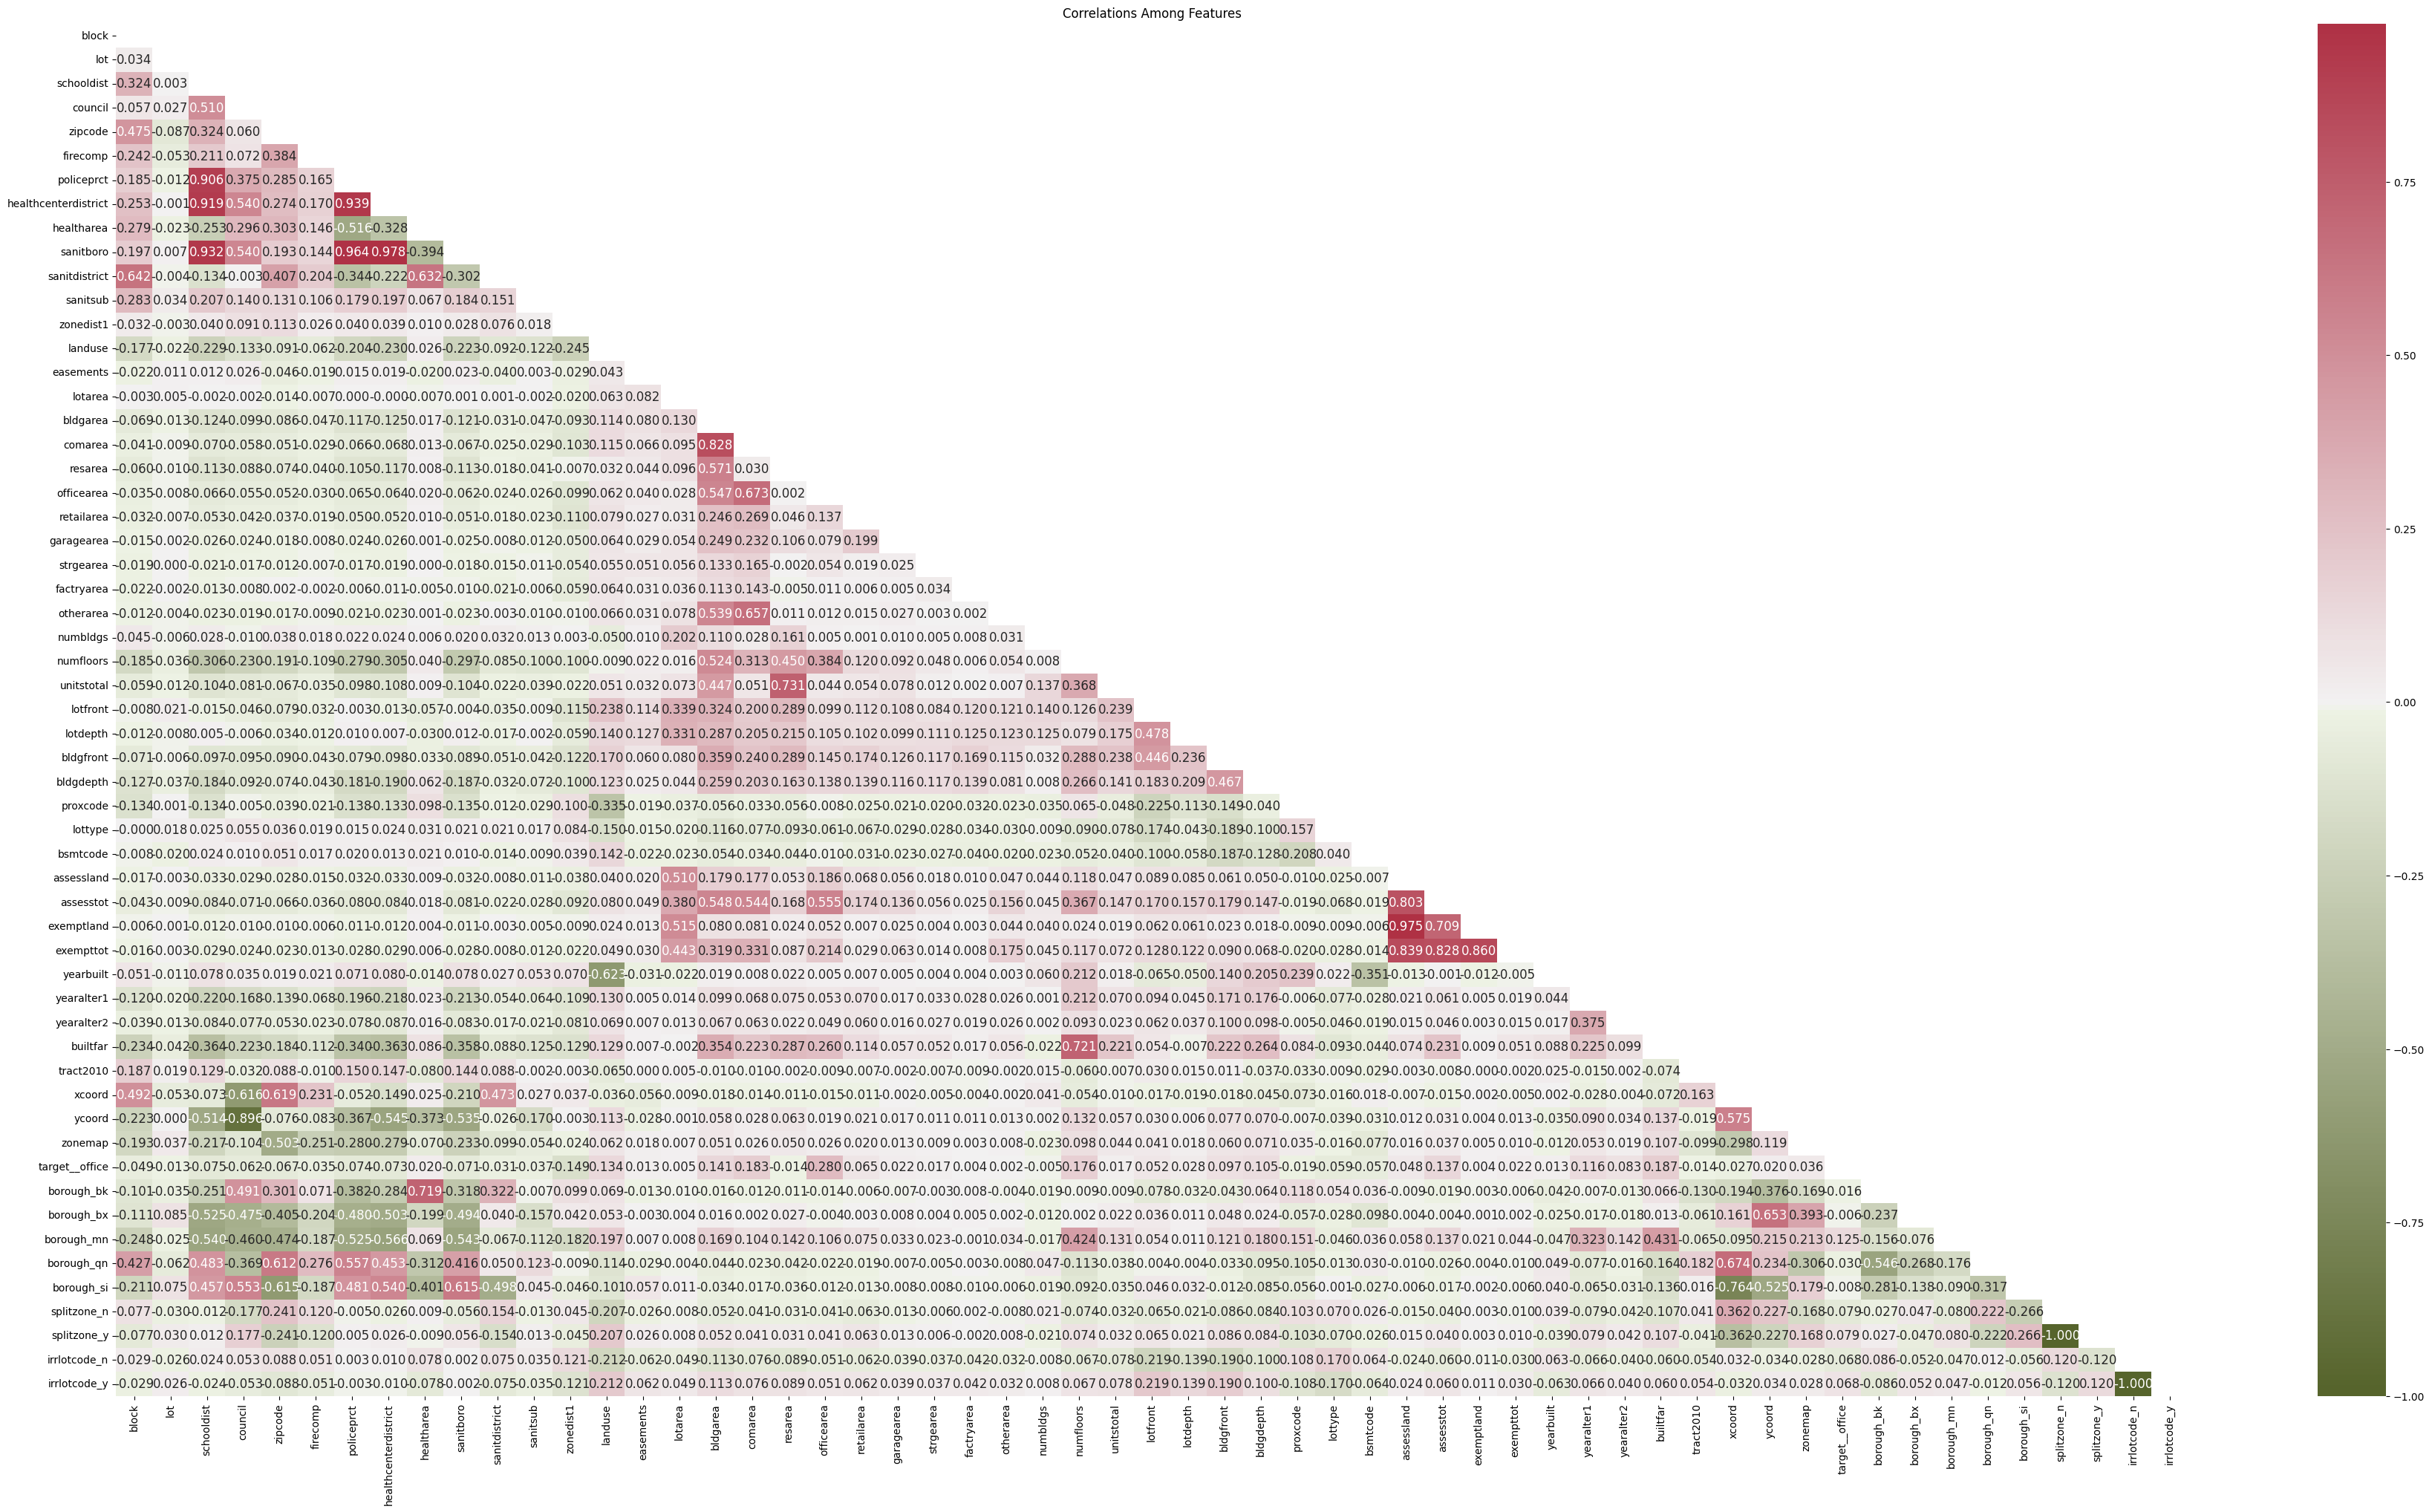

In [ ]:
corr_mat = data_cleaned.corr()

data_mask = np.triu(np.ones_like(corr_mat, dtype = bool))
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
f, ax = plt.subplots(figsize = (45, 24))
sns.heatmap(corr_mat, annot = True,cmap=cmap, fmt = '.3f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Features');

<h4>Calculating a correlation metric that illustrates the relationship between each feature and the target variable, offering insights into their individual impact on the target variable</h4>

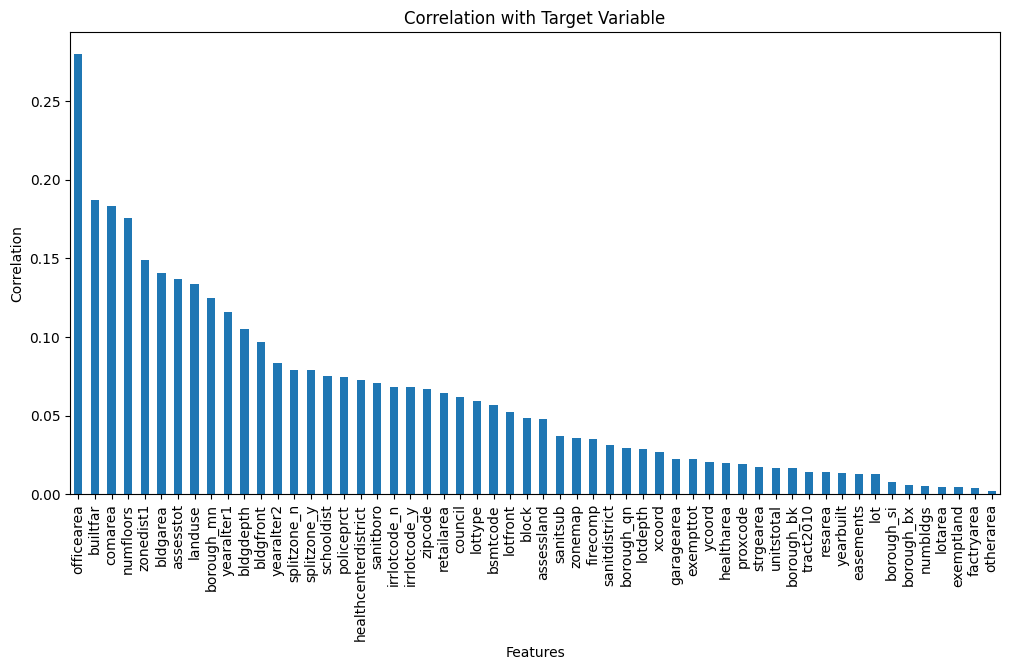

In [ ]:
final_data = data_cleaned.drop(columns=["target__office"])
target = data_cleaned["target__office"].copy(deep=True)

corelation_df = pd.concat([final_data, target], axis=1)

correlation_matrix = corelation_df.corr()

correlation_with_target = correlation_matrix['target__office'].abs()
most_important_features = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
most_important_features.drop("target__office", inplace=True)
most_important_features.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# Models train/test and Results

<ul>
<li>
Experimentation is done on normailsed data with classifiers, Naive Bayes,
Logistic Regression, Neural Network, Random Forest, Bagging Classifier, Gradient Boosting, XGBoost, and a Voting Classifier
</li>
<li>
Based on data, tree based classifiers performed relatively better than other classifiers
</li>
<li>
Additionally class contains helper methods like load/save model, evalution report and inference on test data
</li>
<li>
Below are the detailed reports on each model training results
</li>
</ul>

In [ ]:
a!pip install joblib
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import joblib

class ClassifierModels:
    def __init__(self, X, y, test_size):
      # Split the dataset into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    def train_naive_bayes(self):
        nb_clf = GaussianNB()
        nb_clf.fit(self.X_train, self.y_train)
        return nb_clf

    def train_logistic_regression(self, max_iter=100, class_weights=None, regularization_param=1.0):
        lr_clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=max_iter, class_weight=class_weights, C=regularization_param))
        lr_clf.fit(self.X_train, self.y_train)
        return lr_clf

    def train_neural_network(self, hidden_layer_sizes=(100,), max_iter=1000):
        nn_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
        nn_clf.fit(self.X_train, self.y_train)
        return nn_clf

    def train_random_forest(self, class_weights=None, max_depth=None, random_state=42):
      # Training a random forest classifier
        clf = RandomForestClassifier(class_weight=class_weights, max_depth=max_depth, random_state=random_state)
        clf.fit(self.X_train, self.y_train)
        return clf

    def train_bagging_classifier(self, n_estimators=20, max_samples=1.0, max_depth=None):
        tree = DecisionTreeClassifier(max_depth=max_depth)
        bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=n_estimators, max_samples=max_samples, random_state=42)
        bagging_clf.fit(self.X_train, self.y_train)
        return bagging_clf

    def train_gradient_boosting(self, n_estimators=50, max_depth=None):
      # Training a Gradient Boosting classifier
        gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        gb_clf.fit(self.X_train, self.y_train)
        return gb_clf

    def train_xgboost(self, max_depth=None):
      # Training a an XGBoost classifier
        xgb_clf = XGBClassifier(max_depth=max_depth)
        xgb_clf.fit(self.X_train, self.y_train)
        return xgb_clf

    def train_voting_classifier(self, classifiers):
        # Training a VotingClassifier
        voting_clf = VotingClassifier(estimators=[(f"model{i}", clf) for i, clf in enumerate(classifiers)], voting='hard')
        voting_clf.fit(self.X_train, self.y_train)
        return voting_clf

    def infer_test_data(self, clf, test_data):
      # Predictions on the test data
        y_pred = clf.predict(test_data)
        y_pred_int = y_pred.astype(int)
        plt.figure(figsize=(6, 4))


        plt.hist(y_pred_int[y_pred_int == 0], bins=2, color='blue', alpha=0.7, label='False')
        plt.hist(y_pred_int[y_pred_int == 1], bins=2, color='red', alpha=0.7, label='True')

        plt.xlabel('Predicted Labels')
        plt.ylabel('Frequency')
        plt.title('Distribution of Predicted Labels')
        plt.legend()
        plt.show()
        return y_pred

    def evaluate_classifier(self, clf, threshold=0.5, use_probabilities=False):
      # Classification Report and Confusion matrix for evaluation
        if use_probabilities:
            y_prob = clf.predict_proba(self.X_test)[:, 1]
            y_pred = (y_prob >= threshold).astype(int)
        else:
            y_pred = clf.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        classification_rep = classification_report(self.y_test, y_pred)
        confusion_mat = confusion_matrix(self.y_test, y_pred)

        print("Model Performance:")
        print("Accuracy:", accuracy)
        print("Classification Report:\n", classification_rep)
        fig, ax = plt.subplots(figsize=(5, 3))
        disp = ConfusionMatrixDisplay(confusion_mat, display_labels=['False', 'True'])
        disp.plot(values_format='.0f', ax=ax)
        plt.title('Confusion Matrix')
        plt.show()

    def plot_feature_importance(self, feature_importances):
      # Plotting feature importances of the trained classifier
        feature_importance_series = pd.Series(data=feature_importances, index=self.X_train.columns)
        feature_importance_series.plot(kind='bar', figsize=(10, 6))
        plt.title('Feature Importances')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()

    def save_model(self, clf, model_name, file_path):
      # Saving Trained classifier to a file
        joblib.dump(clf, file_path)
        print(f"Model '{model_name}' saved to {file_path}")

    def load_model(self, model_name, file_path):
      # Loading Trained classifier from a file
        loaded_model = joblib.load(file_path)
        print(f"Model '{model_name}' loaded from {file_path}")

        return loaded_model

In [ ]:
final_data = data_cleaned.drop(columns=["target__office"])
target = data_cleaned["target__office"].copy(deep=True)

# Initialising the class object
ensemble_classifier = ClassifierModels(final_data, target, test_size=0.2)

Model Performance:
Accuracy: 0.9985815172455644
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.97      0.86      0.91      1082

    accuracy                           1.00    131831
   macro avg       0.98      0.93      0.95    131831
weighted avg       1.00      1.00      1.00    131831



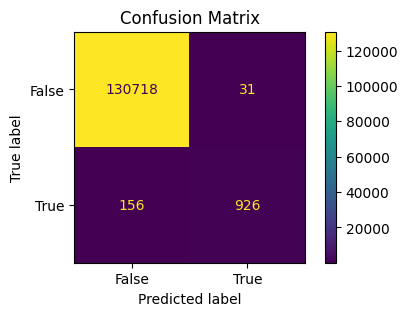

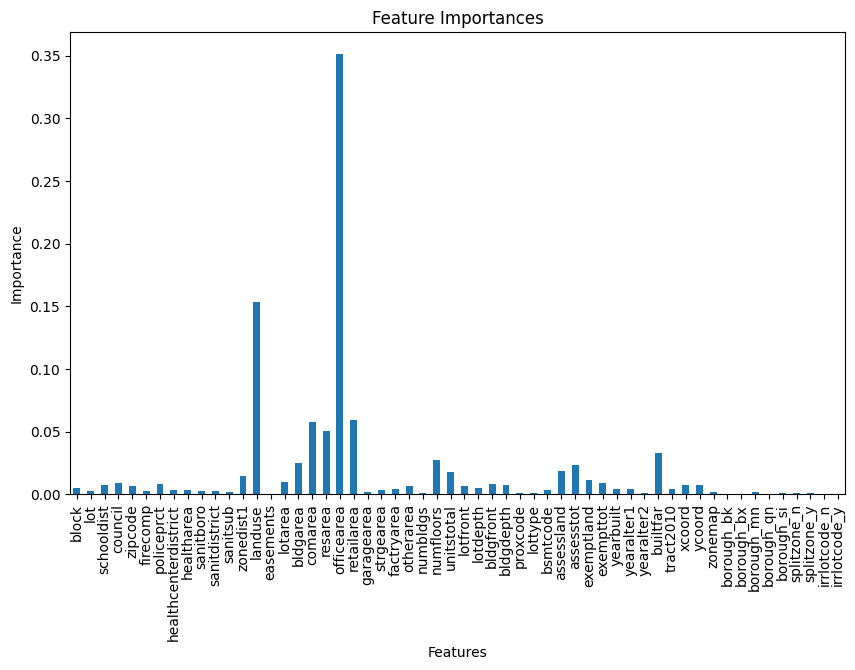

In [ ]:

# Train and evaluate Random Forest without weights as done in base model with increased depth
rf_classifier_base = ensemble_classifier.train_random_forest(max_depth=10,random_state=0)
ensemble_classifier.evaluate_classifier(rf_classifier_base)
ensemble_classifier.plot_feature_importance(rf_classifier_base.feature_importances_)


Model Performance:
Accuracy: 0.9799288482981999
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99    130749
        True       0.17      0.36      0.23      1082

    accuracy                           0.98    131831
   macro avg       0.58      0.67      0.61    131831
weighted avg       0.99      0.98      0.98    131831



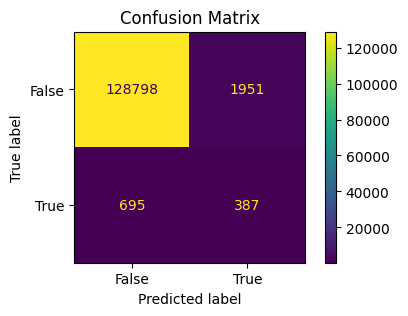

In [ ]:
nb_classifier = ensemble_classifier.train_naive_bayes()
ensemble_classifier.evaluate_classifier(nb_classifier)

Model Performance:
Accuracy: 0.9920807700768408
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.52      0.56      0.54      1082

    accuracy                           0.99    131831
   macro avg       0.76      0.78      0.77    131831
weighted avg       0.99      0.99      0.99    131831



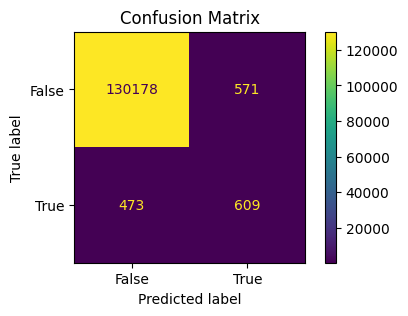

In [ ]:
logisticR_classifier = ensemble_classifier.train_logistic_regression(max_iter= 500, class_weights={0: 1, 1: 5})
ensemble_classifier.evaluate_classifier(logisticR_classifier)

Model Performance:
Accuracy: 0.9964044875636231
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.88      0.65      0.75      1082

    accuracy                           1.00    131831
   macro avg       0.94      0.83      0.87    131831
weighted avg       1.00      1.00      1.00    131831



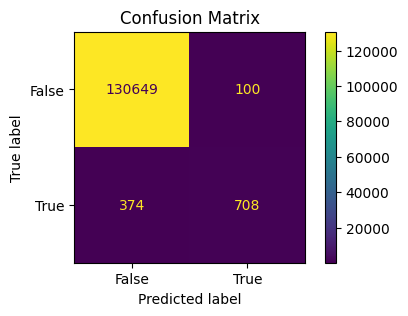

In [ ]:
nn_classifier = ensemble_classifier.train_neural_network(hidden_layer_sizes=(50, 25), max_iter=500)
ensemble_classifier.evaluate_classifier(nn_classifier)

Model Performance:
Accuracy: 0.9989532052400422
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.96      0.91      0.93      1082

    accuracy                           1.00    131831
   macro avg       0.98      0.95      0.97    131831
weighted avg       1.00      1.00      1.00    131831



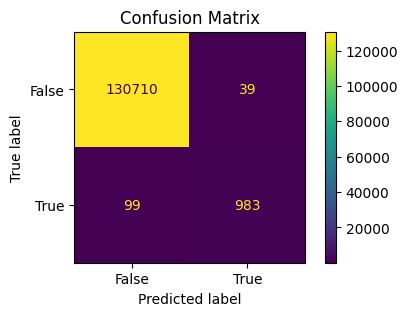

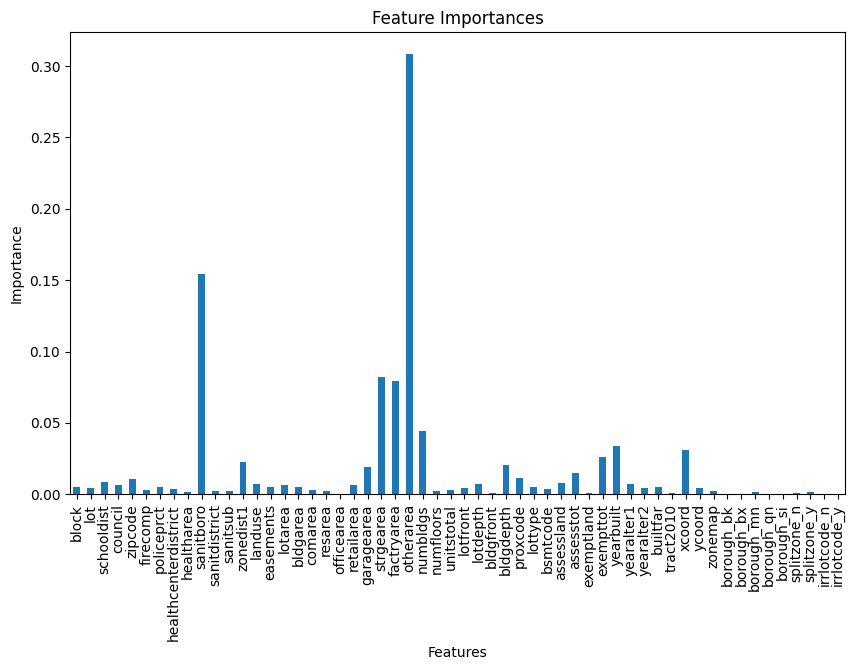

In [ ]:
# Train and evaluate Random Forest with weights
rf_classifier = ensemble_classifier.train_random_forest(class_weights={0: 1, 1: 5}, max_depth=20)
ensemble_classifier.evaluate_classifier(rf_classifier)
ensemble_classifier.plot_feature_importance(rf_classifier.feature_importances_)


Model Performance:
Accuracy: 0.9985891027148395
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.92      0.91      0.91      1082

    accuracy                           1.00    131831
   macro avg       0.96      0.96      0.96    131831
weighted avg       1.00      1.00      1.00    131831



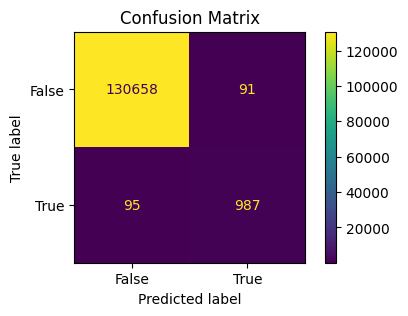

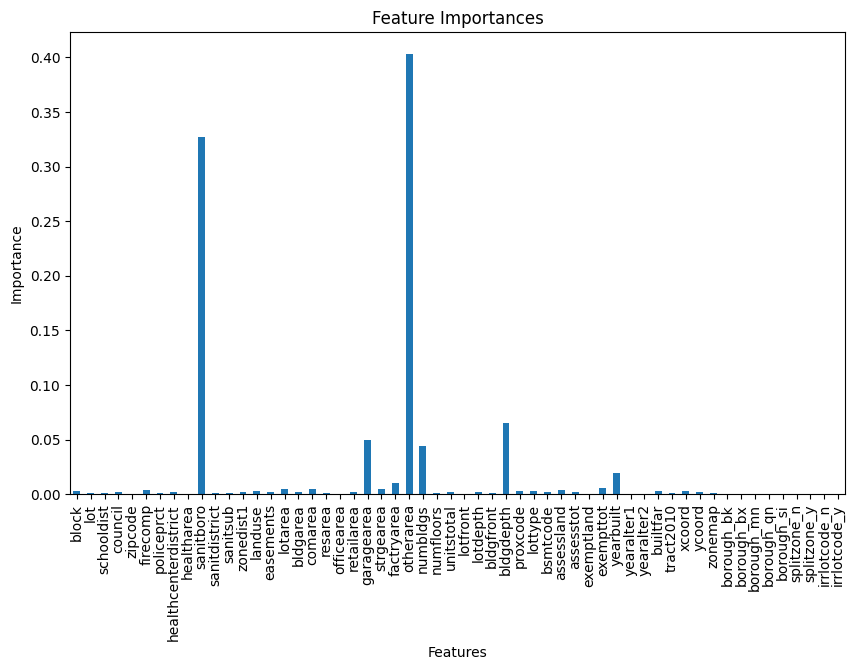

In [ ]:
gb_classifier = ensemble_classifier.train_gradient_boosting(n_estimators=20)
ensemble_classifier.evaluate_classifier(gb_classifier)
ensemble_classifier.plot_feature_importance(gb_classifier.feature_importances_)

Model Performance:
Accuracy: 0.9992490385417694
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.96      0.95      0.95      1082

    accuracy                           1.00    131831
   macro avg       0.98      0.97      0.98    131831
weighted avg       1.00      1.00      1.00    131831



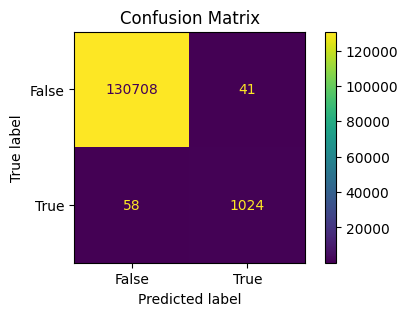

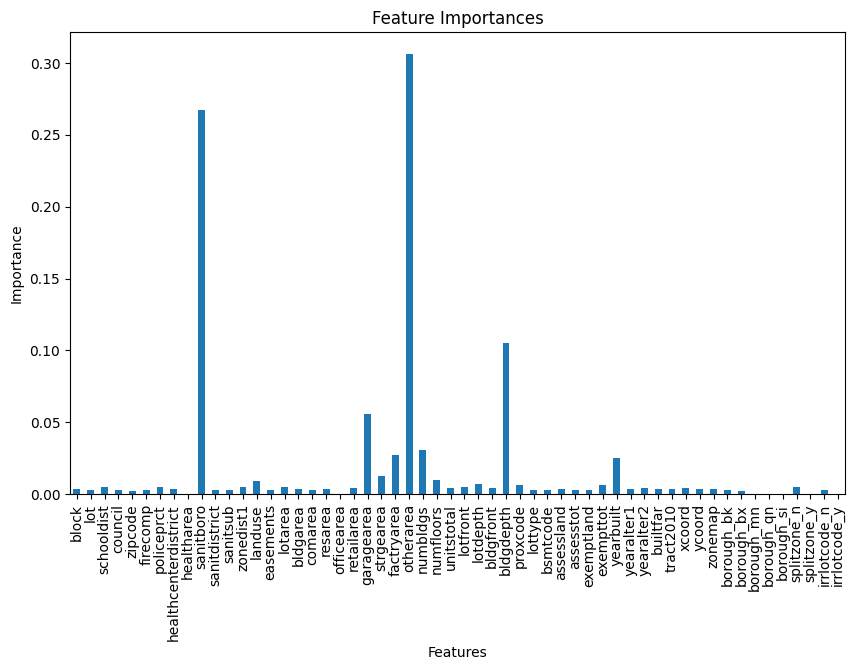

In [ ]:
xgboost_classifier = ensemble_classifier.train_xgboost()
ensemble_classifier.evaluate_classifier(xgboost_classifier, threshold=0.5, use_probabilities=True)
ensemble_classifier.plot_feature_importance(xgboost_classifier.feature_importances_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Performance:
Accuracy: 0.9990973291562683
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.96      0.93      0.94      1082

    accuracy                           1.00    131831
   macro avg       0.98      0.97      0.97    131831
weighted avg       1.00      1.00      1.00    131831



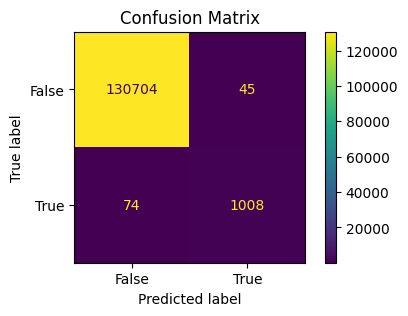

In [ ]:
bagging_classifier_dt = ensemble_classifier.train_bagging_classifier(max_depth=20)
ensemble_classifier.evaluate_classifier(bagging_classifier_dt)

**Majority Voting For True/False class**

In [ ]:
classifiers = [rf_classifier,logisticR_classifier , gb_classifier, xgboost_classifier]
voting_classifier = ensemble_classifier.train_voting_classifier(classifiers)
ensemble_classifier.evaluate_classifier(voting_classifier)

Model Performance:
Accuracy: 0.9988470086701914
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    130749
        True       0.97      0.89      0.93      1082

    accuracy                           1.00    131831
   macro avg       0.98      0.94      0.96    131831
weighted avg       1.00      1.00      1.00    131831

Confusion Matrix:
 [[130717     32]
 [   120    962]]


In [ ]:
final_data = data_cleaned.drop(columns=["target__office"])
target = data_cleaned["target__office"].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(final_data, target, test_size=0.2, random_state=42)

Extracting top features using all tree based models

In [ ]:
all_feature_importances = [rf_classifier.feature_importances_,
                           gb_classifier.feature_importances_,
                           xgboost_classifier.feature_importances_]


mean_importances = np.mean(all_feature_importances, axis=0)

ranked_features = np.argsort(mean_importances)[::-1]

top_n = 10

selected_features_tree_based_models = X_train.columns[ranked_features[:top_n]]

print("Selected Features:", selected_features_tree_based_models)


Selected Features: Index(['otherarea', 'sanitboro', 'bldgdepth', 'garagearea', 'numbldgs',
       'factryarea', 'strgearea', 'yearbuilt', 'xcoord', 'exempttot'],
      dtype='object')


<h2>Resampling and Downsampling of data</h2>

<h4>To handle class imbalance issue down and resampling technique is utilised
<ul>
<li>
Majority class is down sampled with NearMiss algorithm
</li>
<li>
Minority class resampled with SMOTE + ENN (to maintain the essence of data)
</li>
</ul>
</h4>

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

final_data = data_cleaned.drop(columns=["target__office"])
target = data_cleaned["target__office"].copy(deep=True)

X,y = final_data,target

# Define the sampling strategy for Near Miss
nm = NearMiss(version=1, n_neighbors=3, sampling_strategy={ 0: 50000 })
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)

print('Resampled dataset shape (after Near Miss):', Counter(y_resampled_nm))


Resampled dataset shape (after Near Miss): Counter({False: 50000, True: 5509})


In [ ]:
from imblearn.combine import SMOTEENN

# Define the sampling strategy for SMOTE-ENN
smote_enn = SMOTEENN(random_state=42, sampling_strategy={ 1: 12000 })
X_resampled_smote_enn, y_resampled_smote_enn = smote_enn.fit_resample(X_resampled_nm, y_resampled_nm)

print('Resampled dataset shape (after SMOTE-ENN):', Counter(y_resampled_smote_enn))


Resampled dataset shape (after SMOTE-ENN): Counter({False: 47222, True: 9923})


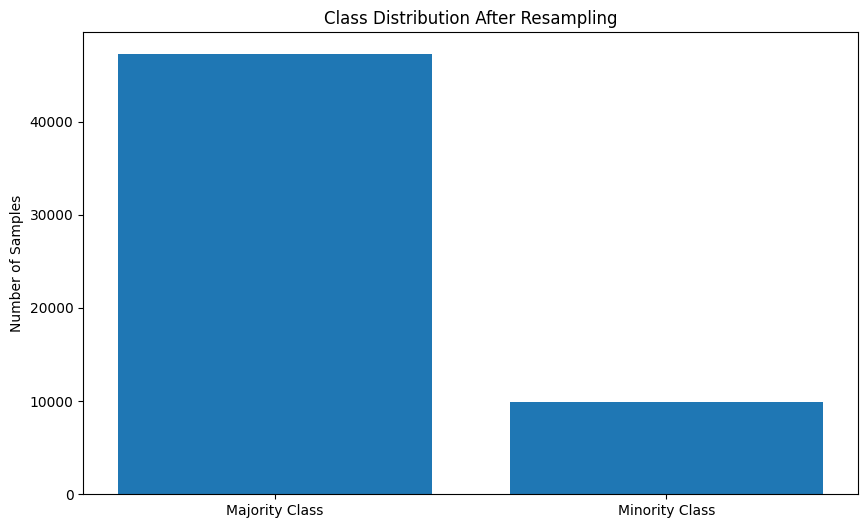

In [ ]:
# Visualize the distribution of the data after resampling
plt.figure(figsize=(10, 6))
plt.bar(['Majority Class', 'Minority Class'], [Counter(y_resampled_smote_enn)[0], Counter(y_resampled_smote_enn)[1]])
plt.title('Class Distribution After Resampling')
plt.ylabel('Number of Samples')
plt.show()

# Model Training on Resampled Data

In [ ]:
ensemble_classifier_resampled = ClassifierModels(X_resampled_smote_enn, y_resampled_smote_enn, test_size=0.2)

Model Performance:
Accuracy: 0.9969376148394435
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.99      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       1.00      0.99      0.99     11429
weighted avg       1.00      1.00      1.00     11429



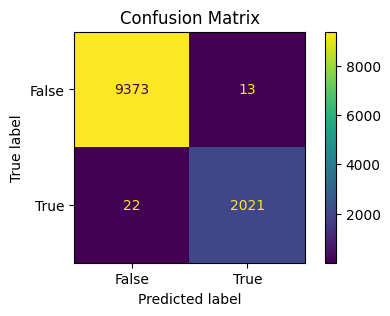

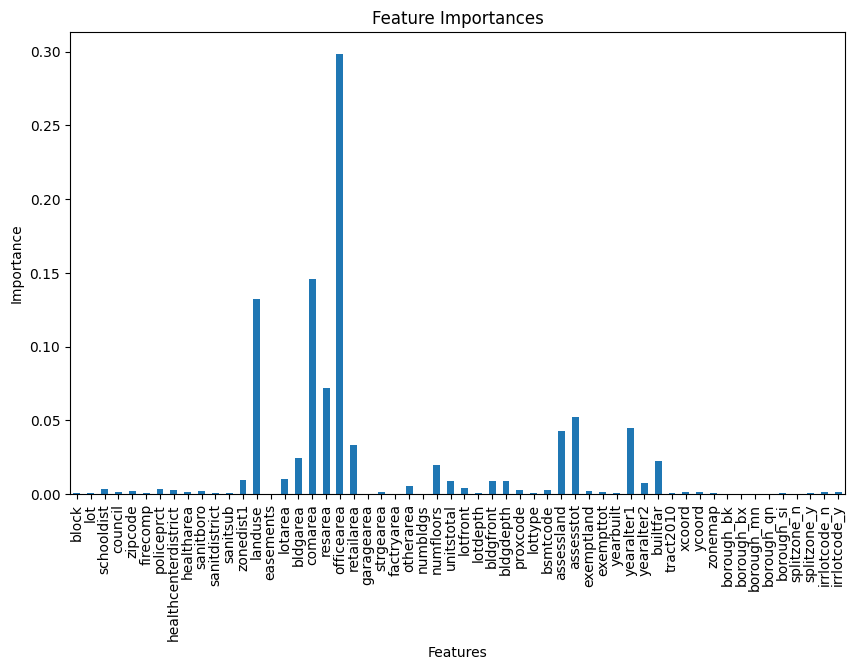

In [ ]:

# Train and evaluate Random Forest with max_depth
# rf_classifier = ensemble_classifier_resampled.train_random_forest(class_weights={0: 1, 1: 5}, max_depth=10)
rf_classifier_resampled = ensemble_classifier_resampled.train_random_forest(max_depth=10)
ensemble_classifier_resampled.evaluate_classifier(rf_classifier_resampled)
ensemble_classifier_resampled.plot_feature_importance(rf_classifier_resampled.feature_importances_)


Model Performance:
Accuracy: 0.9965876279639514
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.99      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       0.99      0.99      0.99     11429
weighted avg       1.00      1.00      1.00     11429



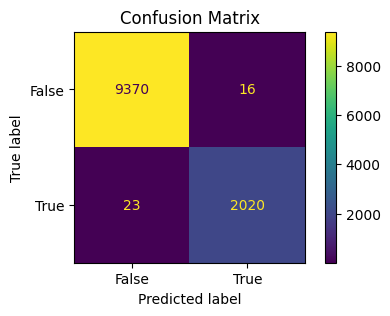

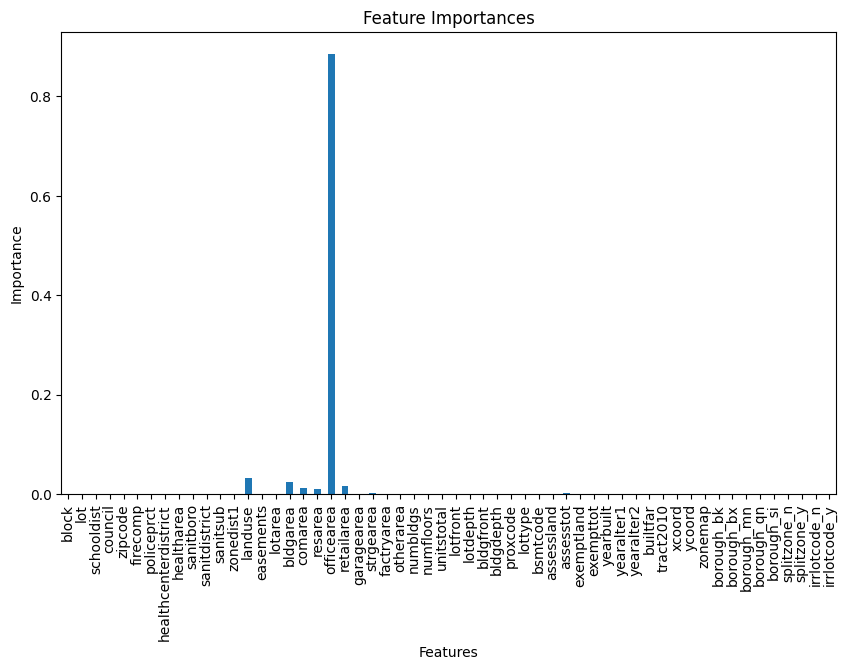

In [ ]:
gb_classifier_resampled = ensemble_classifier_resampled.train_gradient_boosting(n_estimators=20)
ensemble_classifier_resampled.evaluate_classifier(gb_classifier_resampled)
ensemble_classifier_resampled.plot_feature_importance(gb_classifier_resampled.feature_importances_)

Model Performance:
Accuracy: 0.9985125557791583
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.99      1.00      1.00      2043

    accuracy                           1.00     11429
   macro avg       1.00      1.00      1.00     11429
weighted avg       1.00      1.00      1.00     11429



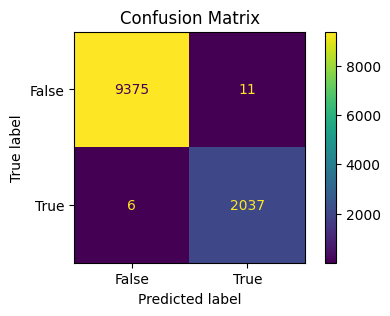

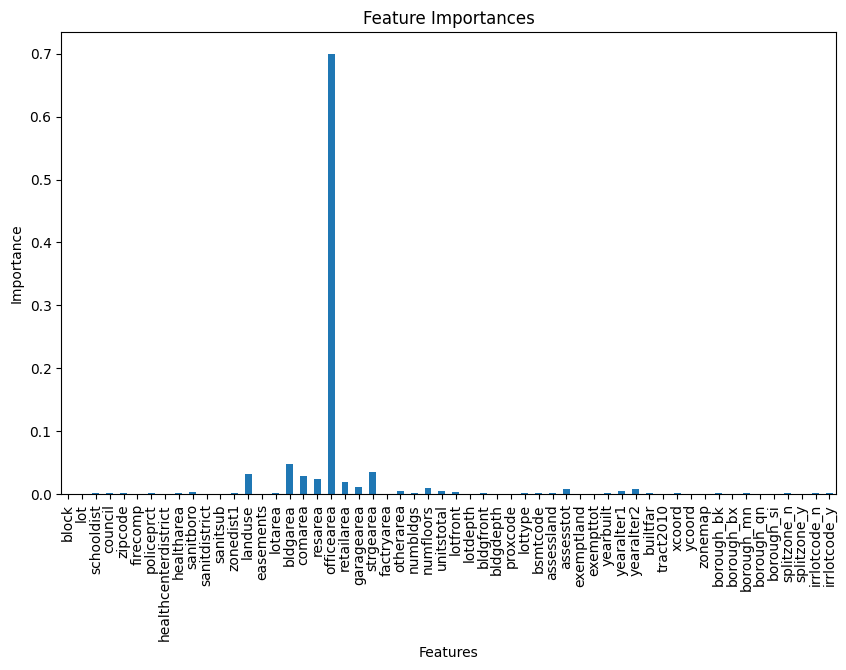

In [ ]:
xgboost_classifier_resampled = ensemble_classifier_resampled.train_xgboost()
ensemble_classifier_resampled.evaluate_classifier(xgboost_classifier_resampled)
ensemble_classifier_resampled.plot_feature_importance(xgboost_classifier_resampled.feature_importances_)

Model Performance:
Accuracy: 0.9817131857555341
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      9386
        True       0.94      0.96      0.95      2043

    accuracy                           0.98     11429
   macro avg       0.96      0.97      0.97     11429
weighted avg       0.98      0.98      0.98     11429



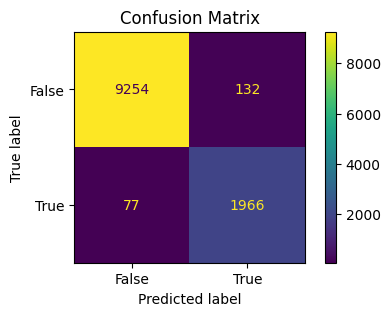

In [ ]:
logisticR_classifier_resampled = ensemble_classifier_resampled.train_logistic_regression(max_iter= 1000, class_weights={0: 1, 1: 5})
ensemble_classifier_resampled.evaluate_classifier(logisticR_classifier_resampled)

Model Performance:
Accuracy: 0.9955376673374748
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.98      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       0.99      0.99      0.99     11429
weighted avg       1.00      1.00      1.00     11429



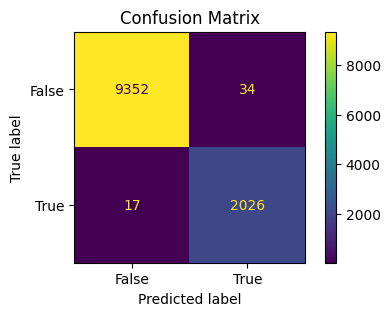

In [ ]:
nn_classifier_resampled = ensemble_classifier_resampled.train_neural_network(hidden_layer_sizes=(50, 25), max_iter=500)
ensemble_classifier_resampled.evaluate_classifier(nn_classifier_resampled)

<h4>Calculating mean feature importance based on all tree based ensemble models</h4>

In [ ]:
all_feature_importances = [rf_classifier_resampled.feature_importances_,
                           gb_classifier_resampled.feature_importances_,
                           xgboost_classifier_resampled.feature_importances_]


mean_importances = np.mean(all_feature_importances, axis=0)

ranked_features = np.argsort(mean_importances)[::-1]

top_n = 10

selected_features_tree_based_models = X_train.columns[ranked_features[:top_n]]

print("Selected Features:", selected_features_tree_based_models)


Selected Features: Index(['officearea', 'landuse', 'comarea', 'resarea', 'bldgarea', 'retailarea',
       'assesstot', 'yearalter1', 'assessland', 'strgearea'],
      dtype='object')


<h4>Employing recursive feature elimination to extract top K features</h4>

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(rf_classifier, n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_resampled_smote_enn, y_resampled_smote_enn)
selected_features_rfe = X_resampled_smote_enn.columns[rfe.support_]
print(selected_features_rfe)

Index(['landuse', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'numfloors', 'assessland', 'assesstot', 'yearalter1'],
      dtype='object')


In [ ]:
rfe_selected_features = selected_features_rfe

# Shortlisting features based on above calculated importances
all_selected_features = set(rfe_selected_features) | set(selected_features_tree_based_models)


print("All selected features:", all_selected_features)

All selected features: {'retailarea', 'assesstot', 'strgearea', 'yearalter1', 'officearea', 'resarea', 'assessland', 'numfloors', 'comarea', 'landuse', 'bldgarea'}


# Model Training on Selected Features

In [ ]:
# Filtering only selected features
X_resampled_smote_enn[all_selected_features]

<ipython-input-201-bd4c90ec87f8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_resampled_smote_enn[all_selected_features]


retailarea   assesstot  strgearea   yearalter1     officearea  \
0         0.000000    0.099108        0.0     0.000000    1240.000000   
1         0.000000    0.074180        0.0     0.000000    1240.000000   
2         0.000000   -0.003722        0.0     0.000000    1240.000000   
3         0.000000   -0.087856        0.0     0.000000    1240.000000   
4         0.000000   -0.087856        0.0     0.000000    1240.000000   
...            ...         ...        ...          ...            ...   
57140  2419.551624   15.745087        0.0  2015.307298    6069.732976   
57141     0.000000  388.727262        0.0  1995.534346  104447.968941   
57142     0.000000    6.325007        0.0  1995.216209    1345.879027   
57143     0.000000   11.195329        0.0  1983.498622    4399.252068   
57144     0.000000    6.920089        0.0     0.000000    2001.265268   

        resarea  assessland  numfloors        comarea  landuse   bldgarea  
0     -0.370748    0.376870   0.000000    1240.000000      3.0   0.291457  
1     -0.370748    0.550613   0.000000    1240.000000      3.0   0.291457  
2     -0.370748    0.346812   0.000000    1240.000000      3.0   0.291457  
3     -0.370748   -0.084243   0.000000    1240.000000      3.0   0.291457  
4     -0.370748   -0.084243   0.000000    1240.000000      3.0   0.291457  
...         ...         ...        ...            ...      ...        ...  
57140 -1.425170    6.854013   7.937027    8489.284600      4.0   4.066134  
57141 -1.425170  148.807465   5.821885  104447.968941      4.0  64.341689  
57142 -0.556147    4.344761   0.000000    2370.477585      4.0   0.864604  
57143 -1.425170   14.751143   1.950138    4399.252068      4.0   1.497018  
57144 -1.425170    5.625613   0.000000    2001.265268      4.0  -0.009255  

[57145 rows x 11 columns]

In [ ]:
ensemble_classifier_resampled_fatured = ClassifierModels(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2)

<ipython-input-202-ffa1a9a8998a>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ensemble_classifier_resampled_fatured = ClassifierModels(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2)


Model Performance:
Accuracy: 0.9980750721847931
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       1.00      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       1.00      1.00      1.00     11429
weighted avg       1.00      1.00      1.00     11429



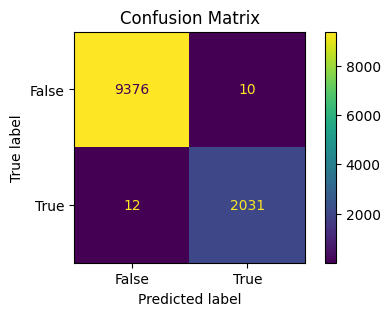

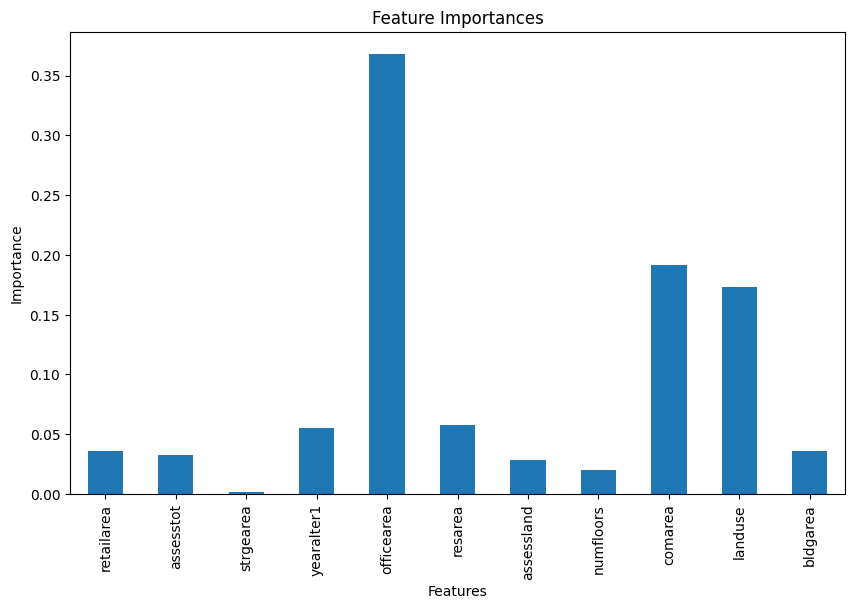

In [ ]:
rf_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_random_forest(max_depth=10)
ensemble_classifier_resampled_fatured.evaluate_classifier(rf_classifier_resampled_featured)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=rf_classifier_resampled_featured,file_path = './rf_classifier_model.joblib',model_name='rf_classifier')

Model Performance:
Accuracy: 0.9978125820281739
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.99      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       1.00      1.00      1.00     11429
weighted avg       1.00      1.00      1.00     11429



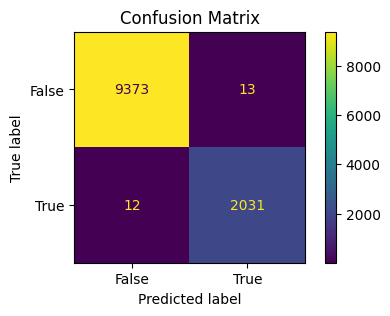

In [ ]:
gb_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_gradient_boosting(n_estimators=20)
ensemble_classifier_resampled_fatured.evaluate_classifier(gb_classifier_resampled_featured)

In [ ]:
# Saving trained model weights
ensemble_classifier_resampled_fatured.save_model(clf=gb_classifier_resampled_featured,file_path = './gb_classifier_model.joblib',model_name='gb_classifier')

Model Performance:
Accuracy: 0.966751246828244
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98      9386
        True       0.87      0.95      0.91      2043

    accuracy                           0.97     11429
   macro avg       0.93      0.96      0.95     11429
weighted avg       0.97      0.97      0.97     11429



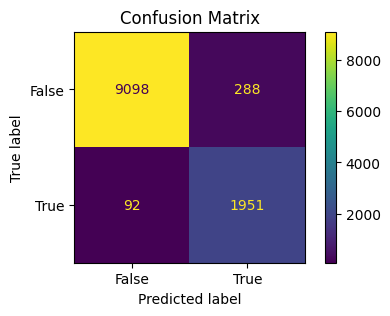

In [ ]:
logisticR_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_logistic_regression(max_iter= 1000)
ensemble_classifier_resampled_fatured.evaluate_classifier(logisticR_classifier_resampled_featured)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=logisticR_classifier_resampled_featured,file_path = './logisticR_classifier_model.joblib',model_name='logisticR_classifier')

Model Performance:
Accuracy: 0.9930002624901566
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00      9386
        True       0.97      0.99      0.98      2043

    accuracy                           0.99     11429
   macro avg       0.99      0.99      0.99     11429
weighted avg       0.99      0.99      0.99     11429



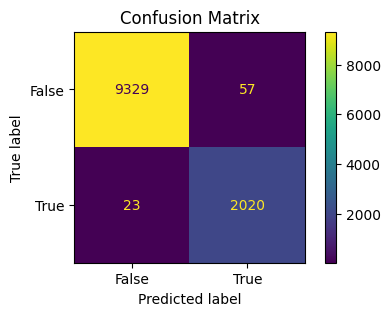

In [ ]:
nn_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_neural_network(hidden_layer_sizes=(50, 25), max_iter=500)
ensemble_classifier_resampled_fatured.evaluate_classifier(nn_classifier_resampled_featured)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=nn_classifier_resampled_featured,file_path = './nn_classifier_model.joblib',model_name='nn_classifier')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Performance:
Accuracy: 0.9976375885904278
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       1.00      0.99      0.99      2043

    accuracy                           1.00     11429
   macro avg       1.00      1.00      1.00     11429
weighted avg       1.00      1.00      1.00     11429



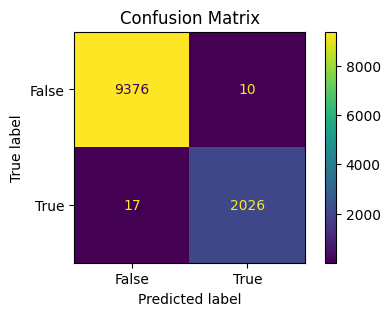

In [ ]:
bagging_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_bagging_classifier(max_depth=20)
ensemble_classifier_resampled_fatured.evaluate_classifier(bagging_classifier_resampled_featured)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=bagging_classifier_resampled_featured,file_path = './bagging_classifier_model.joblib',model_name='bagging_classifier')

Model Performance:
Accuracy: 0.9949251903053635
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       0.98      0.99      0.99      2043

    accuracy                           0.99     11429
   macro avg       0.99      0.99      0.99     11429
weighted avg       0.99      0.99      0.99     11429



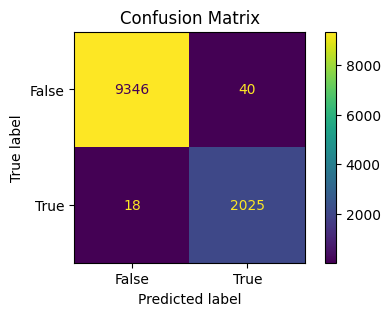

In [ ]:
classifiers = [nn_classifier_resampled_featured,logisticR_classifier_resampled_featured , gb_classifier_resampled_featured]
voting_classifier_resampled_featured = ensemble_classifier_resampled_fatured.train_voting_classifier(classifiers)
ensemble_classifier_resampled_fatured.evaluate_classifier(voting_classifier_resampled_featured)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=voting_classifier_resampled_featured,file_path = './voting_classifier_model.joblib',model_name='voting_classifier')

<h4>Using GridSearchCV to extract best hyperparameters</h4>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 500],
}


X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.5, stratify=y_resampled_smote_enn)

# Taking only 50% of data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_nn = MLPClassifier(random_state=42)

grid_search_nn = GridSearchCV(model_nn, param_grid_nn, cv=4, scoring='f1', n_jobs=-1, verbose=2)
grid_search_nn.fit(X_train_subset, y_train_subset)

best_params_nn = grid_search_nn.best_params_
print(best_params_nn)


Fitting 4 folds for each of 81 candidates, totalling 324 fits


<ipython-input-275-c8e90ea81c47>:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.5, stratify=y_resampled_smote_enn)


{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 100}


<h4>Training NN Classifier on best params found by GridSearchCV</h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2, stratify=y_resampled_smote_enn)
nn_clf = MLPClassifier(activation = 'logistic',hidden_layer_sizes=(100,), max_iter=100, random_state=42)
nn_clf.fit(X_train, y_train)

<ipython-input-276-fb897d07015a>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2, stratify=y_resampled_smote_enn)


MLPClassifier(activation='logistic', max_iter=100, random_state=42)

Model Performance:
Accuracy: 0.9895003937352349
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99      9386
        True       0.96      0.98      0.97      2043

    accuracy                           0.99     11429
   macro avg       0.98      0.98      0.98     11429
weighted avg       0.99      0.99      0.99     11429



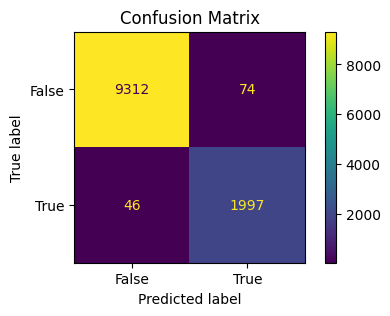

In [ ]:
ensemble_classifier_resampled_fatured.evaluate_classifier(nn_clf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.5, stratify=y_resampled_smote_enn)

# Taking only 50% of data
X_train_subset, _ , y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=4, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_subset, y_train_subset)

best_params_rf = grid_search_rf.best_params_
print(best_params_rf)


Fitting 4 folds for each of 162 candidates, totalling 648 fits


<ipython-input-269-4eb32039d334>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.5, stratify=y_resampled_smote_enn)


{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


<h4>Training Random Forest on best params found by GridSearchCV</h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2, stratify=y_resampled_smote_enn)
rf_model = RandomForestClassifier(class_weight= 'balanced', max_depth= None, min_samples_leaf= 1, min_samples_split= 2,n_estimators= 30,random_state=42)

<ipython-input-271-6d54f1705d24>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote_enn[all_selected_features], y_resampled_smote_enn, test_size=0.2, stratify=y_resampled_smote_enn)


Model Performance:
Accuracy: 0.9996500131245079
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      9386
        True       1.00      1.00      1.00      2043

    accuracy                           1.00     11429
   macro avg       1.00      1.00      1.00     11429
weighted avg       1.00      1.00      1.00     11429



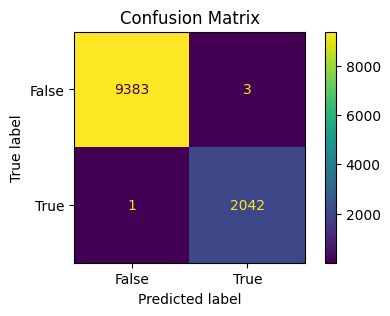

In [ ]:
rf_model.fit(X_train, y_train)
ensemble_classifier_resampled_fatured.evaluate_classifier(rf_model)

In [ ]:
ensemble_classifier_resampled_fatured.save_model(clf=rf_model,file_path = './rf_optimized_model.joblib',model_name='rf_optimized_model')

# Preprocessing on Test data

In [ ]:
# Dropping columns with high null percentage
droped_cloumns_form_train_data = ['landmark', 'spdist1', 'zonedist4', 'overlay1', 'ltdheight', 'zonedist3', 'histdist', 'overlay2', 'ext', 'spdist2', 'spdist3', 'zonedist2']
test_cleaned= test_data.drop(columns=droped_cloumns_form_train_data)
test_rows_with_nulls = test_cleaned.isnull().any(axis=1).sum()
test_cleaned = test_cleaned.dropna()

In [ ]:
robust_scaler = RobustScaler()

# Apply Robust scaling
df_robust_scaled_test = pd.DataFrame(robust_scaler.fit_transform(test_cleaned[numerical_columns]), columns=numerical_columns)

# Combine the results
test_data_normalized = df_robust_scaled_test.copy(deep=True)

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(test_data_normalized)


Normalized DataFrame:
           block       lot  schooldist   council   zipcode  policeprct  \
0      -0.287495 -0.093023    0.666667  0.227273 -0.001106   -0.422222   
1      -0.814764 -0.488372    0.500000 -0.454545 -0.131637    0.266667   
2      -0.199844 -0.604651    0.000000 -0.090909  0.180310    0.044444   
3       1.198091 -0.488372    0.416667 -0.227273  0.210177    0.244444   
4      -0.432022 -0.046512   -0.833333  0.045455  0.000000   -0.177778   
...          ...       ...         ...       ...       ...         ...   
164853 -0.072069  0.372093    0.083333 -0.590909  0.149336    0.155556   
164854  0.783989  1.651163    0.250000  0.000000  0.220133    0.000000   
164855  0.537982  0.837209   -0.166667  0.590909 -0.013274   -0.866667   
164856 -0.573822  0.186047   -1.750000 -1.181818 -1.324115   -1.733333   
164857  0.841839  0.325581    0.250000  0.000000  0.215708    0.088889   

        healthcenterdistrict  healtharea  sanitboro  sanitdistrict  ...  \
0             

In [ ]:
# Coverting all categorical columns to lower case
test_cleaned[object_columns] = test_cleaned[object_columns].apply(lambda x: x.astype(str).str.lower())

In [ ]:
# Same procesing on test data
for col in label_encoding_columns_cleaned:
    test_cleaned[col] = LabelEncoder().fit_transform(test_cleaned[col])

# One-Hot Encoding for columns with 5 or fewer unique values
test_cleaned = pd.get_dummies(test_cleaned, columns=one_hot_encoding_columns_cleaned)

In [ ]:
test_cleaned.index = test_data_normalized.index
print("Original DataFrame index:", test_cleaned.index)
print("Normalized DataFrame index:", test_data_normalized.index)
test_cleaned[numerical_columns] = test_data_normalized.copy(deep=True)
filtered_test_data = test_cleaned[all_selected_features].copy(deep=True)

Original DataFrame index: RangeIndex(start=0, stop=164858, step=1)
Normalized DataFrame index: RangeIndex(start=0, stop=164858, step=1)


<ipython-input-281-3caa59217e34>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  filtered_test_data = test_cleaned[all_selected_features].copy(deep=True)


In [ ]:
#Loading a saved model
model_test = ensemble_classifier_resampled_fatured.load_model(file_path='./rf_optimized_model.joblib', model_name='rf_optimized_model')

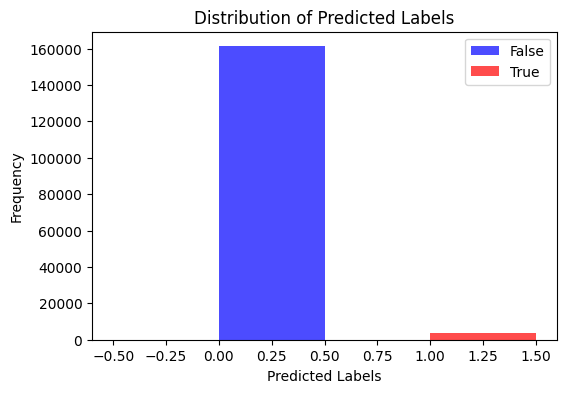

array([False, False, False, ..., False, False, False])

In [ ]:
ensemble_classifier_resampled_fatured.infer_test_data(model_test, filtered_test_data)